# ANOMALY DETECTION

https://scikit-learn.org/stable/modules/outlier_detection.html

La detección de outliers (anomalías) y la detección de novedades son dos conceptos relacionados pero distintos en el campo de la detección de anomalías. Ambos son válidos para identificar patrones inusuales en los datos, pero se aplican en diferentes contextos y con diferentes supuestos.
## Outlier Detection

- Definición: La detección de outliers implica identificar observaciones que son significativamente diferentes o anómalas en comparación con la mayoría de los datos. Estos outliers pueden ser debidos a variaciones en la medición, errores experimentales, o simplemente representar variabilidad natural en los datos.

- Supuestos: Se supone que el conjunto de datos utilizado para entrenar el modelo ya contiene outliers. El modelo aprende a identificar estos outliers en base a los patrones presentes en el conjunto de datos completo.

- Uso: Es común en situaciones donde los datos ya tienen algunos ejemplos de comportamiento anómalo, y el objetivo es identificar más de estos casos.

## Novelty Detection

- Definición: La detección de novedades, por otro lado, se enfoca en identificar nuevas observaciones que difieren significativamente de los datos en los que el modelo fue entrenado. Estas observaciones novedosas pueden no estar presentes en el conjunto de datos de entrenamiento.

- Supuestos: Se asume que el conjunto de datos de entrenamiento está libre de outliers y representa solo el comportamiento "normal". El modelo aprende este comportamiento normal y luego identifica cualquier desviación significativa como novedosa.

- Uso: Es particularmente útil en aplicaciones donde es crucial detectar cambios o eventos nuevos que no se han observado antes.

## Aplicación en Detección de Anomalías

Ambos enfoques son válidos para la detección de anomalías, pero su elección depende del contexto específico:

- Outlier Detection: Útil cuando puedes asumir que tu conjunto de datos incluye tanto datos normales como anómalos, y el objetivo es identificar los anómalos.

- Novelty Detection: Apropiado cuando tienes un conjunto de datos limpio de comportamiento normal y deseas identificar cualquier cosa que se desvíe de este patrón normal.


In [1]:
import numpy as np 
np.random.seed(42)
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import os

# Lectura de datos

The dataset refers to the operating parameters of an HVAC system that controls the environmental comfort of a non-residential building located in Turin (Italy).

The dataset contains 11 variables:

    timestamp;
    temperatures of return, supply, and outdoor air [°C];
    relative humidities of return, supply and outdoor air [% and outdoor air [%];
    the temperature setpoint of the return air [°C];
    the saturation temperature in the humidifier [°C];
    power required by the fans [kW];
    energy required by the fans [kWh].

The data refer to the winters 2019-2020 and 2020-2021.

The Source of this dataset is Borda, Davide (2022), “Development of Anomaly Detectors for HVAC Systems using Machine Learning”, Mendeley Data, V1, doi: 10.17632/mjhr46dkj6.1
Please click here for the web link

In [2]:
path = "../data/Anomaly_detection/raw_data/"
data = "HVAC_NE_EC_19-21.csv"


df = pd.read_csv(os.path.join(path, data))

df.head()

Timestamp   T_Supply   T_Return  SP_Return  T_Saturation  \
0  2019-10-15 00:00:00+02:00  19.859999  20.469999       18.5         19.02   
1  2019-10-15 00:15:00+02:00  19.855000  20.430000       18.5         19.02   
2  2019-10-15 00:30:00+02:00  19.850000  20.410000       18.5         19.02   
3  2019-10-15 00:45:00+02:00  19.840000  20.379999       18.5         19.08   
4  2019-10-15 01:00:00+02:00  19.830000  20.350000       18.5         19.08   

   T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  Power  
0  20.299999  71.110001  58.919998        79.5     0.0    0.0  
1  20.299999  71.320000  59.000000        82.0     0.0    0.0  
2  20.299999  71.470001  59.109997        79.5     0.0    0.0  
3  20.299999  71.439995  59.309998        77.0     0.0    0.0  
4  20.299999  71.580002  59.559998        79.5     0.0    0.0

## inspección de datos

In [3]:
df.tail()

Timestamp   T_Supply   T_Return  SP_Return  \
33883  2021-04-14 22:45:00+02:00  19.539999  20.004999       20.5   
33884  2021-04-14 23:00:00+02:00  19.520000  19.949999       20.5   
33885  2021-04-14 23:15:00+02:00  19.430000  19.955000       20.5   
33886  2021-04-14 23:30:00+02:00  19.420000  19.920000       20.5   
33887  2021-04-14 23:45:00+02:00  19.420000  19.900000       20.5   

       T_Saturation  T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  \
33883     19.619999       14.7  39.020000  27.930000        57.0     0.0   
33884     19.539999       13.7  39.020000  28.090000        57.0     0.0   
33885     19.420000       13.7  39.399998  27.930000        57.0     0.0   
33886     19.400000       13.7  39.599998  28.039999        57.0     0.0   
33887     19.400000       13.7  39.599998  28.150000        57.0     0.0   

       Power  
33883    0.0  
33884    0.0  
33885    0.0  
33886    0.0  
33887    0.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888 entries, 0 to 33887
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     33888 non-null  object 
 1   T_Supply      33888 non-null  float64
 2   T_Return      33888 non-null  float64
 3   SP_Return     33888 non-null  float64
 4   T_Saturation  33888 non-null  float64
 5   T_Outdoor     33888 non-null  float64
 6   RH_Supply     33888 non-null  float64
 7   RH_Return     33888 non-null  float64
 8   RH_Outdoor    33888 non-null  float64
 9   Energy        33888 non-null  float64
 10  Power         33888 non-null  float64
dtypes: float64(10), object(1)
memory usage: 2.8+ MB


In [5]:
#plt.title('Feature distribution')
df.hist(figsize= (12, 9), bins= 20)
plt.show()

In [6]:
df.columns

Index(['Timestamp', 'T_Supply', 'T_Return', 'SP_Return', 'T_Saturation',
       'T_Outdoor', 'RH_Supply', 'RH_Return', 'RH_Outdoor', 'Energy', 'Power'],
      dtype='object')

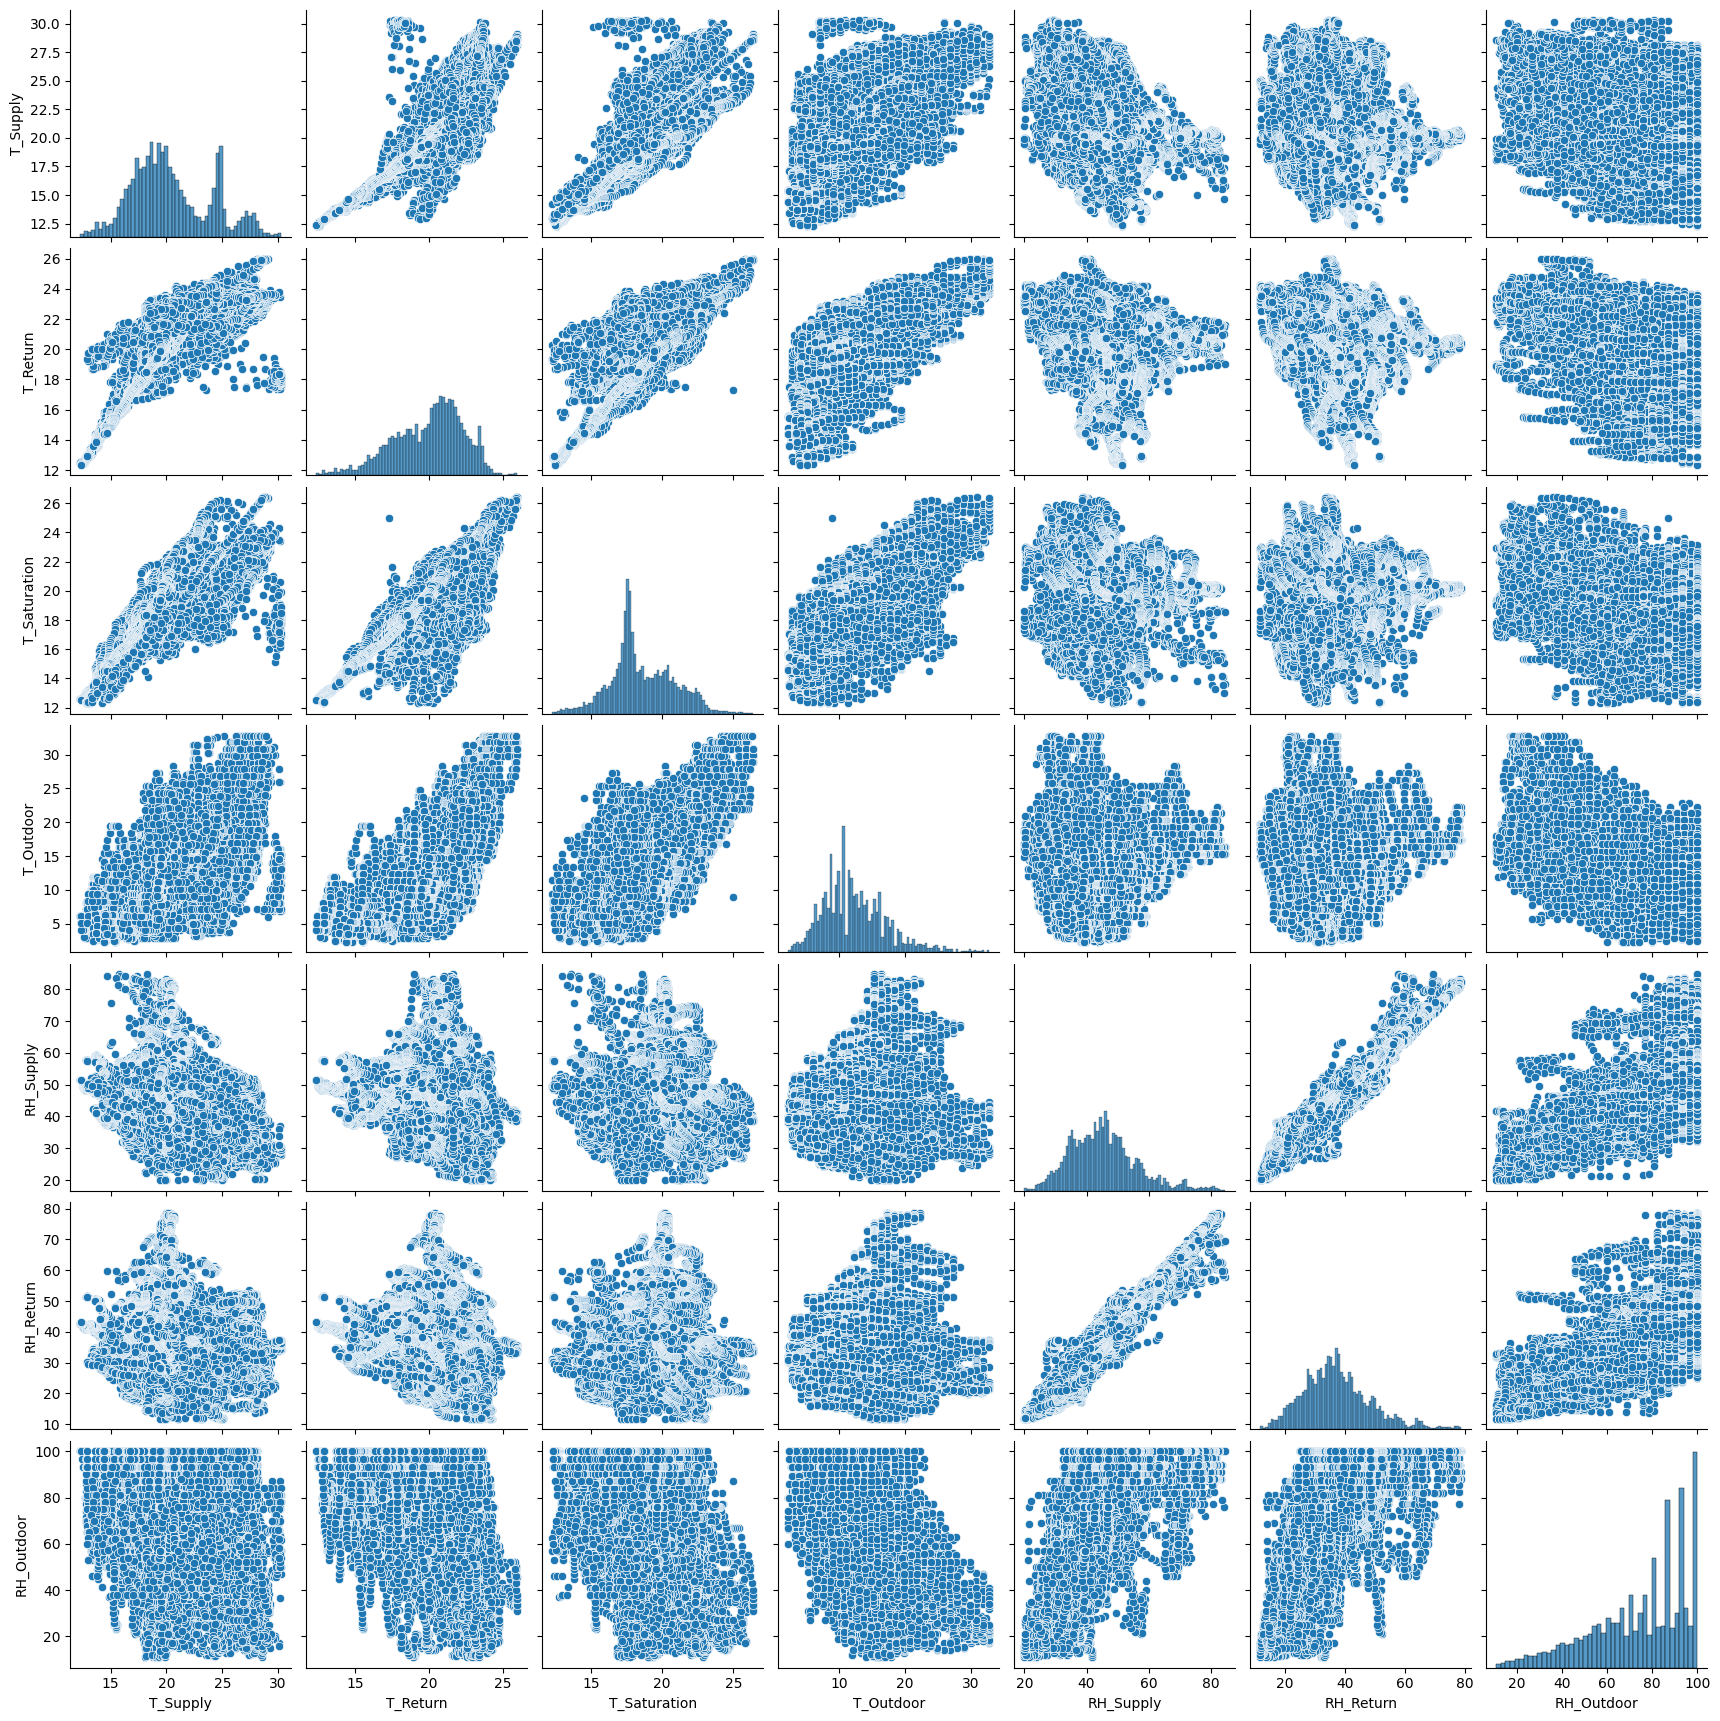

In [7]:
df_num = df[['T_Supply', 'T_Return', 'T_Saturation',
             'T_Outdoor', 'RH_Supply', 'RH_Return', 'RH_Outdoor']]
sns.pairplot(df_num)
plt.show()

In [8]:
df.sample(10)

Timestamp   T_Supply   T_Return  SP_Return  \
32313  2021-03-27 14:15:00+01:00  24.699999  23.355000       21.5   
21499  2020-12-01 22:45:00+01:00  17.209999  17.779999       22.5   
5780   2019-12-14 05:00:00+01:00  16.299999  16.424999       22.5   
26901  2021-01-30 05:15:00+01:00  17.045000  17.395000       22.5   
12827  2020-02-25 14:45:00+01:00  28.039999  23.164999       22.5   
33510  2021-04-11 01:30:00+02:00  19.799999  20.285000       20.5   
33442  2021-04-10 08:30:00+02:00  18.719999  21.889999       21.5   
1959   2019-11-04 09:45:00+01:00  20.170000  19.990000       22.5   
33318  2021-04-09 01:30:00+02:00  20.090000  20.619999       21.5   
10226  2020-01-29 12:30:00+01:00  24.779999  21.549999       22.5   

       T_Saturation  T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  \
32313     22.600000  27.799999  45.340000  37.899998        55.0    13.0   
21499     18.000000   6.300000  49.049999  39.469997       100.0     0.0   
5780      16.400000   8.600000  46.680000  37.939999        78.0     0.0   
26901     17.139999   8.800000  42.639999  33.309998        70.0     0.0   
12827     22.639999  17.000000  40.259998  38.389999        82.0     7.0   
33510     20.020000  10.800000  44.259998  33.160000        93.0     0.0   
33442     16.600000  12.800000  45.320000  29.010000        73.5    12.0   
1959      19.119999  12.300000  58.969997  51.750000       100.0     6.0   
33318     20.699999  12.900000  31.469999  19.010000        47.5     0.0   
10226     17.500000  15.000000  36.320000  30.969999        52.5    13.0   

       Power  
32313  5.184  
21499  0.000  
5780   0.000  
26901  0.000  
12827  2.664  
33510  0.000  
33442  4.980  
1959   2.520  
33318  0.000  
10226  5.124

# Limpieza de datos

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'].str[0:-6])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888 entries, 0 to 33887
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     33888 non-null  datetime64[ns]
 1   T_Supply      33888 non-null  float64       
 2   T_Return      33888 non-null  float64       
 3   SP_Return     33888 non-null  float64       
 4   T_Saturation  33888 non-null  float64       
 5   T_Outdoor     33888 non-null  float64       
 6   RH_Supply     33888 non-null  float64       
 7   RH_Return     33888 non-null  float64       
 8   RH_Outdoor    33888 non-null  float64       
 9   Energy        33888 non-null  float64       
 10  Power         33888 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 2.8 MB
None


Timestamp   T_Supply   T_Return  SP_Return  T_Saturation  \
0 2019-10-15 00:00:00  19.859999  20.469999       18.5         19.02   
1 2019-10-15 00:15:00  19.855000  20.430000       18.5         19.02   
2 2019-10-15 00:30:00  19.850000  20.410000       18.5         19.02   
3 2019-10-15 00:45:00  19.840000  20.379999       18.5         19.08   
4 2019-10-15 01:00:00  19.830000  20.350000       18.5         19.08   

   T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  Power  
0  20.299999  71.110001  58.919998        79.5     0.0    0.0  
1  20.299999  71.320000  59.000000        82.0     0.0    0.0  
2  20.299999  71.470001  59.109997        79.5     0.0    0.0  
3  20.299999  71.439995  59.309998        77.0     0.0    0.0  
4  20.299999  71.580002  59.559998        79.5     0.0    0.0

## Feature Engineering

In [10]:

def saturation_vapor_pressure(T):
    # La ecuación de Antoine para calcular la presión de vapor de saturación
    # T debe estar en grados Celsius
    A = 8.07131
    B = 1730.63
    C = 233.426
    return 10 ** (A - (B / (C + T)))*0.133322  # este numero es para pasar de hmmg a kpa


def specific_humidity(RH, T, P_atm=101.325):
    P_sat = saturation_vapor_pressure(T)                # Calcular la presión de vapor de saturación en kPa
    RH = RH/100                                         # pasar la humedad relativa de porcentaje a fracción
    return 0.622 * (RH * P_sat) / (P_atm - RH * P_sat)  # Calcular la humedad específica


def calculate_enthalpy(T, RH, P=101.325):
    c_p = 1.005                           # Calor específico del aire a presión constante en kJ/kg°C
    h_vap = 2501                          # Entalpía de vaporización del agua en kJ/kg
    w = specific_humidity(RH, T, P)       # Calcular la humedad específica
    h = c_p * (T) + w * h_vap               # Calcular la entalpía en kJ/kg
    return h


def delta_h(df):
    h_out = calculate_enthalpy(T= df['T_Outdoor'], RH= df['RH_Outdoor'])   # entalpia out
    h_sup = calculate_enthalpy(T= df['T_Supply'], RH= df['RH_Supply'])   # entalpia supply
    return h_sup-h_out


def calculate_wet_bulb_temperature(df):
    RH = df['RH_Outdoor'] / 100  # Convertir la humedad relativa a una fracción
    Twb = (df['T_Outdoor'] * np.arctan(0.151977 * np.sqrt(RH + 8.313659)) +
           np.arctan(df['T_Outdoor'] + RH) - np.arctan(RH - 1.676331) +
           0.00391838 * RH**1.5 * np.arctan(0.023101 * RH) - 4.686035)
    return Twb


def calculate_KPI(df):

    from sklearn.linear_model import HuberRegressor
    
    Delta_h = delta_h(df)                                    # Calcular la diferencia de entalpía como un vector
    T_wb_out = calculate_wet_bulb_temperature(df)            # Calcular la temperatura de bulbo húmedo como un vector
    huber = HuberRegressor()                                 # Crear el regresor de Huber y ajustarlo con los vectores creados
    huber.fit(T_wb_out.values.reshape(-1, 1), Delta_h)
    D_hat_h = huber.predict(T_wb_out.values.reshape(-1, 1))  # Predecir la entalpía ajustada a la línea de mejor ajuste con el regresor de Huber
    KPI = Delta_h / D_hat_h                                  # Calcular el KPI como un vector y no como una columna en el DataFrame
    
    return KPI                       # Devolver el vector KPI

df['delta_h'] = delta_h(df)
df['KPI'] = calculate_KPI(df)
t_wb_out = calculate_wet_bulb_temperature(df)
df['T_wb_out'] = calculate_wet_bulb_temperature(df)

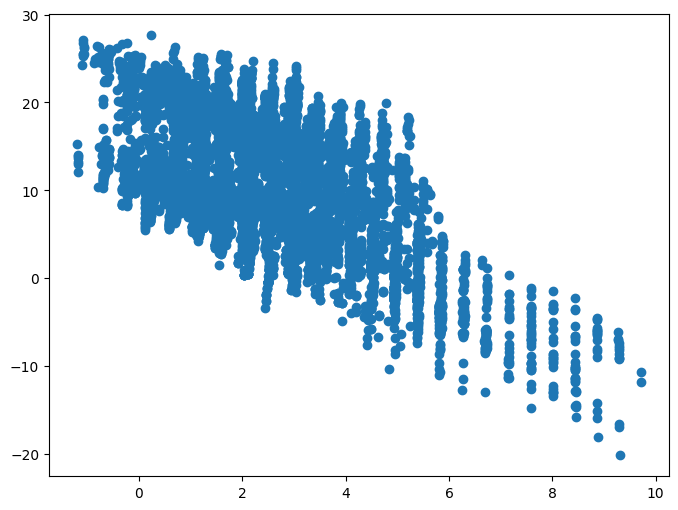

In [11]:
plt.figure(figsize= (8, 6))

plt.scatter(x= t_wb_out[:10000], y= df['delta_h'][:10000].values)
plt.show()

In [12]:
display(df.head())
display(df.tail())

Timestamp   T_Supply   T_Return  SP_Return  T_Saturation  \
0 2019-10-15 00:00:00  19.859999  20.469999       18.5         19.02   
1 2019-10-15 00:15:00  19.855000  20.430000       18.5         19.02   
2 2019-10-15 00:30:00  19.850000  20.410000       18.5         19.02   
3 2019-10-15 00:45:00  19.840000  20.379999       18.5         19.08   
4 2019-10-15 01:00:00  19.830000  20.350000       18.5         19.08   

   T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  Power   delta_h  \
0  20.299999  71.110001  58.919998        79.5     0.0    0.0 -4.330843   
1  20.299999  71.320000  59.000000        82.0     0.0    0.0 -5.213420   
2  20.299999  71.470001  59.109997        79.5     0.0    0.0 -4.225259   
3  20.299999  71.439995  59.309998        77.0     0.0    0.0 -3.317295   
4  20.299999  71.580002  59.559998        79.5     0.0    0.0 -4.237626   

        KPI  T_wb_out  
0 -1.845855  6.289753  
1 -2.216344  6.286114  
2 -1.800854  6.289753  
3 -1.417131  6.293024  
4 -1.806125  6.289753

Timestamp   T_Supply   T_Return  SP_Return  T_Saturation  \
33883 2021-04-14 22:45:00  19.539999  20.004999       20.5     19.619999   
33884 2021-04-14 23:00:00  19.520000  19.949999       20.5     19.539999   
33885 2021-04-14 23:15:00  19.430000  19.955000       20.5     19.420000   
33886 2021-04-14 23:30:00  19.420000  19.920000       20.5     19.400000   
33887 2021-04-14 23:45:00  19.420000  19.900000       20.5     19.400000   

       T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  Power   delta_h  \
33883       14.7  39.020000  27.930000        57.0     0.0    0.0  3.837602   
33884       13.7  39.020000  28.090000        57.0     0.0    0.0  5.738965   
33885       13.7  39.399998  27.930000        57.0     0.0    0.0  5.704928   
33886       13.7  39.599998  28.039999        57.0     0.0    0.0  5.756475   
33887       13.7  39.599998  28.150000        57.0     0.0    0.0  5.756475   

            KPI  T_wb_out  
33883  0.611142  3.907501  
33884  0.821125  3.477608  
33885  0.816255  3.477608  
33886  0.823630  3.477608  
33887  0.823630  3.477608

In [13]:
df.sample(5)

Timestamp   T_Supply  T_Return  SP_Return  T_Saturation  \
16817 2020-04-14 04:15:00  22.160000    22.205       22.5     22.260000   
8981  2020-01-16 13:15:00  24.855000    21.705       22.5     17.959999   
28831 2021-02-19 07:45:00  18.445000    19.475       22.5     16.600000   
29919 2021-03-02 15:45:00  22.355000    22.260       19.5     20.400000   
20641 2020-11-23 00:15:00  16.809999    16.785       22.5     16.459999   

       T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  Power    delta_h  \
16817  17.799999  39.239998  30.279999        67.0     0.0  0.000  -0.586755   
8981   11.400000  33.599998  27.299999        57.0    12.0  5.004  18.018029   
28831  11.100000  49.680000  38.559998        87.0    14.0  4.956   5.918465   
29919  21.299999  29.179998  20.500000        22.0    13.0  5.232   4.643808   
20641   8.900000  43.450001  31.900000        81.0     0.0  0.000   6.545355   

            KPI  T_wb_out  
16817 -0.143112  5.227554  
8981   2.088719  2.485975  
28831  0.658957  2.270831  
29919  2.801913  6.707000  
20641  0.620939  1.326261

In [14]:
df.describe()

Timestamp      T_Supply      T_Return  \
count                          33888  33888.000000  33888.000000   
mean   2020-07-14 07:06:56.855524096     20.436936     19.994425   
min              2019-10-15 00:00:00     12.264999     12.344999   
25%              2020-01-11 05:56:15     17.879999     18.389999   
50%              2020-10-15 11:52:30     19.785000     20.385000   
75%              2021-01-14 17:48:45     23.256249     21.699999   
max              2021-04-14 23:45:00     30.295000     25.990000   
std                              NaN      3.535683      2.357756   

          SP_Return  T_Saturation     T_Outdoor     RH_Supply     RH_Return  \
count  33888.000000  33888.000000  33888.000000  33888.000000  33888.000000   
mean      22.302290     18.580051     12.414164     45.433972     37.251636   
min       18.500000     12.300000      2.300000     19.939999     11.730000   
25%       22.500000     17.260000      8.900000     37.709999     29.420000   
50%       22.500000     18.059999     11.800000     44.669998     36.230000   
75%       22.500000     20.180000     15.300000     51.180000     43.329998   
max       23.500000     26.400000     32.799999     84.699997     78.699997   
std        0.745301      2.237516      4.925918     10.765867     11.253552   

         RH_Outdoor        Energy         Power       delta_h           KPI  \
count  33888.000000  33888.000000  33888.000000  33888.000000  33888.000000   
mean      73.803308      5.769196      2.308225      8.556169      1.109249   
min       11.000000      0.000000      0.000000    -30.258044   -460.383018   
25%       60.000000      0.000000      0.000000      4.628432      0.623785   
50%       78.500000      0.000000      0.000000      8.623630      0.972413   
75%       93.000000     12.000000      4.980000     12.470193      1.547195   
max      100.000000     15.000000      5.316000     31.468454   2491.813094   
std       21.116373      6.074394      2.432835      6.548068     16.263161   

           T_wb_out  
count  33888.000000  
mean       2.853741  
min       -1.764271  
25%        1.312206  
50%        2.555091  
75%        4.093220  
max       11.596007  
std        2.151066

# Feature extraction

In [15]:
df.set_index('Timestamp', inplace= True)

df_half_hourly = df.resample('30T').mean()
df_hourly = df.resample('H').mean()
print(df_hourly.info())
print(df_half_hourly.info())
df_hourly.sample(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13152 entries, 2019-10-15 00:00:00 to 2021-04-14 23:00:00
Freq: H
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   T_Supply      8472 non-null   float64
 1   T_Return      8472 non-null   float64
 2   SP_Return     8472 non-null   float64
 3   T_Saturation  8472 non-null   float64
 4   T_Outdoor     8472 non-null   float64
 5   RH_Supply     8472 non-null   float64
 6   RH_Return     8472 non-null   float64
 7   RH_Outdoor    8472 non-null   float64
 8   Energy        8472 non-null   float64
 9   Power         8472 non-null   float64
 10  delta_h       8472 non-null   float64
 11  KPI           8472 non-null   float64
 12  T_wb_out      8472 non-null   float64
dtypes: float64(13)
memory usage: 1.4 MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2019-10-15 00:00:00 to 2021-04-14 23:30:00
Freq: 30T
Data columns (total 13 columns):
 # 

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-01-25 17:00:00  18.298749  18.278749       22.5     18.514999      13.40   
2020-01-26 16:00:00  16.317500  16.325000       22.5     16.160000      14.65   
2020-05-08 08:00:00        NaN        NaN        NaN           NaN        NaN   
2020-06-03 08:00:00        NaN        NaN        NaN           NaN        NaN   
2020-07-14 01:00:00        NaN        NaN        NaN           NaN        NaN   
2020-06-17 18:00:00        NaN        NaN        NaN           NaN        NaN   
2019-11-29 10:00:00  26.688750  21.837500       22.5     21.120000       9.85   
2021-01-12 12:00:00  16.317500  19.841249       22.5     14.630000       8.05   
2019-11-01 20:00:00  20.643750  20.680000       22.5     20.744999      14.80   
2020-08-04 18:00:00        NaN        NaN        NaN           NaN        NaN   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2020-01-25 17:00:00  40.349999  30.649999      59.500    0.00  0.000   
2020-01-26 16:00:00  43.697499  35.587500      64.000    0.00  0.000   
2020-05-08 08:00:00        NaN        NaN         NaN     NaN    NaN   
2020-06-03 08:00:00        NaN        NaN         NaN     NaN    NaN   
2020-07-14 01:00:00        NaN        NaN         NaN     NaN    NaN   
2020-06-17 18:00:00        NaN        NaN         NaN     NaN    NaN   
2019-11-29 10:00:00  41.552499  39.552500      85.875    6.00  2.472   
2021-01-12 12:00:00  36.167499  23.259999      63.125   12.25  4.902   
2019-11-01 20:00:00  61.079999  53.744999      94.000    1.50  0.000   
2020-08-04 18:00:00        NaN        NaN         NaN     NaN    NaN   

                       delta_h       KPI  T_wb_out  
Timestamp                                           
2020-01-25 17:00:00   3.947371  0.532127  3.342249  
2020-01-26 16:00:00  -2.314365 -0.388530  3.874913  
2020-05-08 08:00:00        NaN       NaN       NaN  
2020-06-03 08:00:00        NaN       NaN       NaN  
2020-07-14 01:00:00        NaN       NaN       NaN  
2020-06-17 18:00:00        NaN       NaN       NaN  
2019-11-29 10:00:00  23.418743  2.372642  1.724765  
2021-01-12 12:00:00   8.201775  0.741616  1.011301  
2019-11-01 20:00:00   4.355053  0.687107  3.865087  
2020-08-04 18:00:00        NaN       NaN       NaN

In [16]:
df_half_hourly.dropna(axis= 0, inplace= True)
df_half_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16944 entries, 2019-10-15 00:00:00 to 2021-04-14 23:30:00
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   T_Supply      16944 non-null  float64
 1   T_Return      16944 non-null  float64
 2   SP_Return     16944 non-null  float64
 3   T_Saturation  16944 non-null  float64
 4   T_Outdoor     16944 non-null  float64
 5   RH_Supply     16944 non-null  float64
 6   RH_Return     16944 non-null  float64
 7   RH_Outdoor    16944 non-null  float64
 8   Energy        16944 non-null  float64
 9   Power         16944 non-null  float64
 10  delta_h       16944 non-null  float64
 11  KPI           16944 non-null  float64
 12  T_wb_out      16944 non-null  float64
dtypes: float64(13)
memory usage: 1.8 MB


In [17]:
df_hourly.dropna(axis= 0, inplace= True)
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8472 entries, 2019-10-15 00:00:00 to 2021-04-14 23:00:00
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   T_Supply      8472 non-null   float64
 1   T_Return      8472 non-null   float64
 2   SP_Return     8472 non-null   float64
 3   T_Saturation  8472 non-null   float64
 4   T_Outdoor     8472 non-null   float64
 5   RH_Supply     8472 non-null   float64
 6   RH_Return     8472 non-null   float64
 7   RH_Outdoor    8472 non-null   float64
 8   Energy        8472 non-null   float64
 9   Power         8472 non-null   float64
 10  delta_h       8472 non-null   float64
 11  KPI           8472 non-null   float64
 12  T_wb_out      8472 non-null   float64
dtypes: float64(13)
memory usage: 926.6 KB


In [18]:
df_half_hourly.reset_index(inplace= True)
df_hourly.reset_index(inplace=True)
df_half_hourly.head()

Timestamp   T_Supply   T_Return  SP_Return  T_Saturation  \
0 2019-10-15 00:00:00  19.857499  20.450000       18.5     19.020000   
1 2019-10-15 00:30:00  19.845000  20.395000       18.5     19.050000   
2 2019-10-15 01:00:00  19.830000  20.335000       18.5     19.090000   
3 2019-10-15 01:30:00  19.829999  20.304999       18.5     19.129999   
4 2019-10-15 02:00:00  19.814999  20.265000       18.5     19.160000   

   T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  Power   delta_h  \
0  20.299999  71.215001  58.959999       80.75     0.0    0.0 -4.772131   
1  20.299999  71.454998  59.209998       78.25     0.0    0.0 -3.771277   
2  20.299999  71.590000  59.609999       80.75     0.0    0.0 -4.707157   
3  19.299999  71.684998  59.829998       86.50     0.0    0.0 -3.871179   
4  19.299999  71.765000  60.055000       83.50     0.0    0.0 -2.814665   

        KPI  T_wb_out  
0 -2.031100  6.287933  
1 -1.608993  6.291388  
2 -2.003427  6.287933  
3 -1.256177  5.844707  
4 -0.916121  5.850462

In [19]:
# Extraer mes, día del mes y hora del día
df_hourly['month'] = df_hourly['Timestamp'].dt.month
df_hourly['day'] = df_hourly['Timestamp'].dt.day
df_hourly['hour'] = df_hourly['Timestamp'].dt.hour

df_hourly.set_index('Timestamp', inplace=True)
df_hourly.sample(10)

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-03-28 15:00:00  24.947500  22.082500       22.5     22.360000  25.100000   
2021-04-13 10:00:00  21.985000  21.657500       21.5     18.040000  15.850000   
2020-03-03 08:00:00  24.441250  20.663749       22.5     17.820000  10.150000   
2019-11-20 16:00:00  24.282500  22.396249       22.5     17.095000  16.150000   
2019-12-13 12:00:00  24.748749  21.305000       22.5     17.340000   5.550000   
2019-12-29 10:00:00  15.744999  15.926250       22.5     15.915000   9.100000   
2020-01-06 00:00:00  15.508750  15.776249       22.5     15.794999   7.900000   
2020-04-10 14:00:00  25.834999  23.479999       23.5     23.630000  31.549999   
2021-02-13 19:00:00  16.171249  16.354999       22.5     16.160000   3.850000   
2020-02-26 02:00:00  19.431249  19.593750       22.5     20.229999  10.900000   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2020-03-28 15:00:00  37.995000  32.632498      41.625    4.00  1.296   
2021-04-13 10:00:00  39.812499  30.694999      39.500   12.25  4.932   
2020-03-03 08:00:00  24.810000  21.232499      42.250   12.75  5.178   
2019-11-20 16:00:00  49.815000  45.412498      88.000   12.00  4.836   
2019-12-13 12:00:00  35.344999  29.302499      87.750   12.50  4.956   
2019-12-29 10:00:00  47.117500  38.364998      82.500    0.00  0.000   
2020-01-06 00:00:00  47.554998  38.975000      66.875    0.00  0.000   
2020-04-10 14:00:00  31.762500  24.684999      21.875   13.00  5.187   
2021-02-13 19:00:00  40.667499  33.362499      62.500    0.00  0.000   
2020-02-26 02:00:00  52.407498  44.402499      89.250    0.00  0.000   

                       delta_h       KPI   T_wb_out  month  day  hour  
Timestamp                                                              
2020-03-28 15:00:00  -2.163451  2.097968   8.338919      3   28    15  
2021-04-13 10:00:00  11.470485  2.102084   4.412804      4   13    10  
2020-03-03 08:00:00  18.023219  1.904989   1.972708      3    3     8  
2019-11-20 16:00:00   6.557570  1.215825   4.472324     11   20    16  
2019-12-13 12:00:00  24.109081  1.842235  -0.201537     12   13    12  
2019-12-29 10:00:00   4.978687  0.476468   1.408154     12   29    10  
2020-01-06 00:00:00   9.616220  0.858797   0.933633      1    6     0  
2020-04-10 14:00:00  -5.099146  0.925268  11.004246      4   10    14  
2021-02-13 19:00:00  16.191740  1.140642  -0.884870      2   13    19  
2020-02-26 02:00:00   8.902140  0.973997   2.174358      2   26     2

In [20]:
# Extraer mes, día del mes y hora del día
df_half_hourly['month'] = df_half_hourly['Timestamp'].dt.month
df_half_hourly['day'] = df_half_hourly['Timestamp'].dt.day
df_half_hourly['hour'] = df_half_hourly['Timestamp'].dt.hour

df_half_hourly.set_index('Timestamp', inplace=True)
df_half_hourly.sample(10)

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-12-28 10:00:00  13.965000  14.007500       22.5     14.139999   3.300000   
2020-03-19 05:00:00  19.905000  19.865000       22.5     20.280000  12.300000   
2020-02-04 09:00:00  27.265000  21.849999       22.5     21.500000  16.400000   
2019-12-23 18:30:00  24.224999  22.169999       22.5     17.079999  12.600000   
2020-01-06 15:30:00  24.837499  20.497499       22.5     17.669999  13.600000   
2021-01-14 04:30:00  14.482499  14.885000       22.5     14.870000   3.600000   
2019-12-12 11:30:00  24.705000  21.164999       22.5     17.520000   8.600000   
2019-11-05 21:30:00  18.829999  19.702500       22.5     20.700000  13.900000   
2020-10-22 22:30:00  20.979999  21.280000       22.5     22.479999  17.299999   
2021-04-09 16:00:00  20.472500  23.137500       21.5     18.249999  20.799999   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2020-12-28 10:00:00  48.814999  40.569997       93.00     0.0  0.000   
2020-03-19 05:00:00  45.990000  37.520000       72.25     0.0  0.000   
2020-02-04 09:00:00  34.595000  32.890000       17.00     6.5  2.586   
2019-12-23 18:30:00  31.864998  25.454999       30.75    12.5  4.998   
2020-01-06 15:30:00  35.775000  31.609999       60.75    12.5  5.004   
2021-01-14 04:30:00  44.809998  35.770000       93.00     0.0  0.000   
2019-12-12 11:30:00  34.874999  28.709999      100.00    12.5  4.926   
2019-11-05 21:30:00  66.684998  56.499998       87.00     0.0  0.000   
2020-10-22 22:30:00  59.484999  50.964998       88.00     0.0  0.000   
2021-04-09 16:00:00  38.529999  26.074999       36.00    12.5  4.998   

                       delta_h       KPI  T_wb_out  month  day  hour  
Timestamp                                                             
2020-12-28 10:00:00  11.652855  0.783942 -1.280789     12   28    10  
2020-03-19 05:00:00   8.219206  1.022250  2.840841      3   19     5  
2020-02-04 09:00:00  25.472775  5.039273  4.643581      2    4     9  
2019-12-23 18:30:00  19.689734  2.550907  3.035718     12   23    18  
2020-01-06 15:30:00  14.070013  1.989986  3.428327      1    6    15  
2021-01-14 04:30:00  11.026423  0.755160 -1.133060      1   14     4  
2019-12-12 11:30:00  15.735594  1.443993  1.110505     12   12    11  
2019-11-05 21:30:00   6.044220  0.868380  3.495059     11    5    21  
2020-10-22 22:30:00  -0.397895 -0.088014  4.972641     10   22    22  
2021-04-09 16:00:00   0.317064 -0.279195  6.512177      4    9    16

In [21]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import pandas as pd
# from scipy.stats import gaussian_kde

# start_date = '2019-12-15'
# end_date = '2020-02-15'

# print(len(df_hourly))
# df_h_2019_2020 = df_hourly.loc[start_date:end_date]
# print(len(df_h_2019_2020))
# df_h_2019_2020 = df_h_2019_2020[df_h_2019_2020['delta_h'] >=0]
# #Asumimos que df es tu DataFrame y ya contiene las columnas 'Twb_out' y 'Delta_h'
# print(len(df_h_2019_2020))
# #Calcula la densidad de los puntos
# x = df_h_2019_2020['T_wb_out']
# y = df_h_2019_2020['delta_h']
# xy = np.vstack([x, y])
# z = gaussian_kde(xy)(xy)

# #Crea el gráfico de dispersión
# fig, ax = plt.subplots()
# scatter = ax.scatter(x, y, c=z, s=50, cmap='viridis')

# #Añade la barra de color
# cbar = plt.colorbar(scatter)
# cbar.set_label('Density')

# #Añade la línea de regresión
# sns.regplot(x='T_wb_out', y='delta_h', data=df_h_2019_2020, scatter=False, ax=ax, color='red')

# #Añade etiquetas y título si es necesario
# ax.set_xlabel('Twb, out [°C]')
# ax.set_ylabel('Δh [kJ/kg dry air]')
# ax.set_title('Scatter plot with regression line and density')

# #Muestra el gráfico
# plt.show()

In [22]:
# df_hourly.hist(figsize=(15, 10), bins= 20)
# plt.show()

In [23]:
# df_num_h = df_hourly[['T_Supply', 'T_Return', 'T_Saturation',
#                       'T_Outdoor', 'RH_Supply', 'RH_Return', 'RH_Outdoor']]
# sns.pairplot(df_num_h)
# plt.show()

# Data Processing

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
# partición externa (mantenemos el orden por que puede ser interesante para inferencia)

X_train_full, X_test = train_test_split(df_half_hourly, shuffle= False, test_size=0.1)

print('Particion Externa de datos: ')
print(X_train_full.shape)
print(X_test.shape)
print('\n')
# particion interna: aqui si mezclamos los datos

X_train, X_val = train_test_split(X_train_full, random_state=42, shuffle= True, test_size=0.25)

print('Particion Externa de datos: ')
print(X_train.shape)
print(X_val.shape)

Particion Externa de datos: 
(15249, 16)
(1695, 16)


Particion Externa de datos: 
(11436, 16)
(3813, 16)


In [26]:
X_train_full.head()

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2019-10-15 00:00:00  19.857499  20.450000       18.5     19.020000  20.299999   
2019-10-15 00:30:00  19.845000  20.395000       18.5     19.050000  20.299999   
2019-10-15 01:00:00  19.830000  20.335000       18.5     19.090000  20.299999   
2019-10-15 01:30:00  19.829999  20.304999       18.5     19.129999  19.299999   
2019-10-15 02:00:00  19.814999  20.265000       18.5     19.160000  19.299999   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2019-10-15 00:00:00  71.215001  58.959999       80.75     0.0    0.0   
2019-10-15 00:30:00  71.454998  59.209998       78.25     0.0    0.0   
2019-10-15 01:00:00  71.590000  59.609999       80.75     0.0    0.0   
2019-10-15 01:30:00  71.684998  59.829998       86.50     0.0    0.0   
2019-10-15 02:00:00  71.765000  60.055000       83.50     0.0    0.0   

                      delta_h       KPI  T_wb_out  month  day  hour  
Timestamp                                                            
2019-10-15 00:00:00 -4.772131 -2.031100  6.287933     10   15     0  
2019-10-15 00:30:00 -3.771277 -1.608993  6.291388     10   15     0  
2019-10-15 01:00:00 -4.707157 -2.003427  6.287933     10   15     1  
2019-10-15 01:30:00 -3.871179 -1.256177  5.844707     10   15     1  
2019-10-15 02:00:00 -2.814665 -0.916121  5.850462     10   15     2

In [27]:
X_test.tail()

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2021-04-14 21:30:00  19.270000  20.680000       21.5     18.899999       14.7   
2021-04-14 22:00:00  19.479999  20.220000       20.5     19.350000       14.7   
2021-04-14 22:30:00  19.539999  20.032499       20.5     19.570000       14.7   
2021-04-14 23:00:00  19.475000  19.952499       20.5     19.480000       13.7   
2021-04-14 23:30:00  19.420000  19.910000       20.5     19.400000       13.7   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2021-04-14 21:30:00  39.379999  26.659999       54.00     0.0    0.0   
2021-04-14 22:00:00  39.095000  27.649998       56.25     0.0    0.0   
2021-04-14 22:30:00  39.020000  27.849999       57.00     0.0    0.0   
2021-04-14 23:00:00  39.209999  28.010000       57.00     0.0    0.0   
2021-04-14 23:30:00  39.599998  28.095000       57.00     0.0    0.0   

                      delta_h       KPI  T_wb_out  month  day  hour  
Timestamp                                                            
2021-04-14 21:30:00  4.242619  0.676321  3.911320      4   14    21  
2021-04-14 22:00:00  3.947589  0.628826  3.908482      4   14    22  
2021-04-14 22:30:00  3.837602  0.611142  3.907501      4   14    22  
2021-04-14 23:00:00  5.721947  0.818690  3.477608      4   14    23  
2021-04-14 23:30:00  5.756475  0.823630  3.477608      4   14    23

## Guardamos los datos procesados

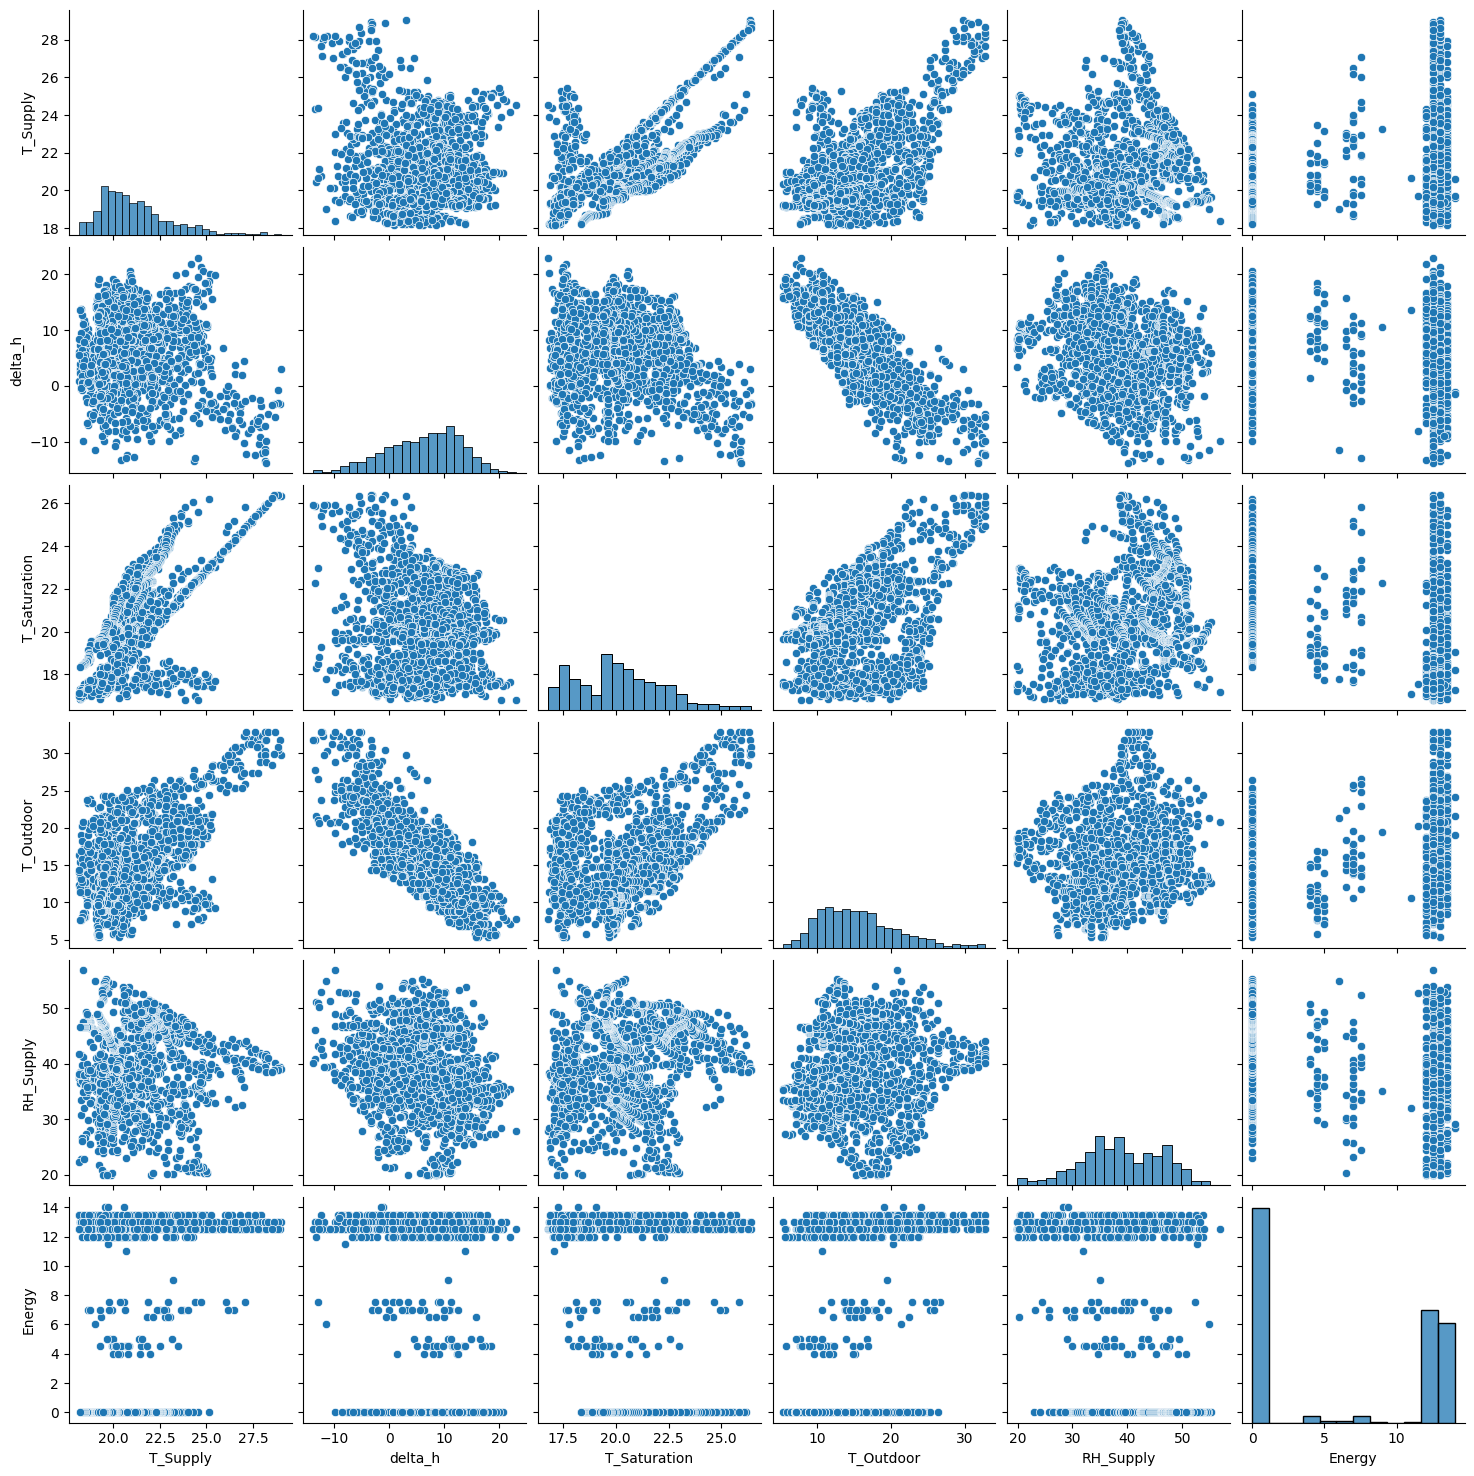

In [28]:
sns.pairplot(X_test[['T_Supply', 'delta_h', 'T_Saturation',
             'T_Outdoor', 'RH_Supply', 'Energy']])
plt.show()

In [29]:
data_path = '../data/Anomaly_detection/processed_data/'

# X_train.to_csv(path + 'HVAC_train_processed.csv')
# X_test.to_csv(path + 'HVAC_test_processed.csv')

from load_store_utils import guardar_datos_procesados

guardar_datos_procesados(data= X_train_full, name= 'HVAC_train_full_processed.csv', ruta_datos= data_path)
guardar_datos_procesados(data= X_test, name= 'HVAC_test_processeded.csv', ruta_datos=data_path)

Los datos HVAC_train_full_processed.csv ya existen en el directorio ../data/Anomaly_detection/processed_data/.
Los datos HVAC_test_processeded.csv ya existen en el directorio ../data/Anomaly_detection/processed_data/.


False

## Escalado de datos

In [30]:
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)
X_val_scl = scaler.transform(X_val)

X_train_scl_df = pd.DataFrame(X_train_scl, columns= scaler.feature_names_in_, index= X_train.index)
X_val_scl_df = pd.DataFrame(X_val_scl, columns= scaler.feature_names_in_, index= X_val.index)

In [31]:
X_train_scl_df.head()

T_Supply  T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                     
2020-04-09 23:00:00  0.662214  1.426083   1.599365      2.583675   1.605107   
2020-11-20 20:00:00  1.448211  1.230479   0.859225      1.303768  -0.027849   
2020-01-20 19:30:00  1.220018  0.775488   0.119085     -0.454952  -0.621651   
2021-02-02 13:30:00 -0.117617  0.786119   0.119085     -0.183317   0.905269   
2020-01-27 19:00:00  1.235094  0.842461   0.119085     -0.395100  -0.133885   

                     RH_Supply  RH_Return  RH_Outdoor    Energy     Power  \
Timestamp                                                                   
2020-04-09 23:00:00  -1.168410  -1.431299   -1.664394 -0.960379 -0.959378   
2020-11-20 20:00:00  -1.072470  -0.916250   -1.290617  0.046256  0.064811   
2020-01-20 19:30:00  -1.646246  -1.499307   -0.991596  1.136778  1.099066   
2021-02-02 13:30:00  -0.001296  -0.281054    0.005142  1.220665  1.177076   
2020-01-27 19:00:00  -0.811662  -0.579837    0.254326  1.220665  1.192174   

                      delta_h       KPI  T_wb_out     month       day  \
Timestamp                                                               
2020-04-09 23:00:00 -0.995300 -0.030158  1.611591 -0.529507 -0.798599   
2020-11-20 20:00:00  1.857548  0.204311  0.014721  0.968411  0.452389   
2020-01-20 19:30:00  1.682046  0.116400 -0.578710 -1.171472  0.452389   
2021-02-02 13:30:00 -1.654423 -0.208433  0.912605 -0.957483 -1.594683   
2020-01-27 19:00:00  0.937143  0.086210 -0.126481 -1.171472  1.248472   

                         hour  
Timestamp                      
2020-04-09 23:00:00  1.668730  
2020-11-20 20:00:00  1.234558  
2020-01-20 19:30:00  1.089834  
2021-02-02 13:30:00  0.221490  
2020-01-27 19:00:00  1.089834

## Guardamos el scaler

In [32]:
from load_store_utils import guardar_modelo

name=  'scaler_trained.pickle'
path = './models/anomaly_detection/'

guardar_modelo(scaler, name= name, ruta_modelo= path)

Modelo guardado con éxito en ./models/anomaly_detection/scaler_trained.pickle


True

# Unsupervised machine learning

In [33]:
# novelti detection adn outlier detection
from sklearn.ensemble import IsolationForest      # outlier detection

## Isolation Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

### Train

In [34]:
IF = IsolationForest(n_estimators=100, contamination=0.05)
#IF.fit(X_train_scl_df)

IF_train_labels =  IF.fit_predict(X_train_scl_df)
X_train_w_labels = X_train.copy()
X_train_w_labels['IF_prediction'] = IF_train_labels

X_train_w_labels.head()

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-04-09 23:00:00  22.745000  23.127499       23.5         23.99  19.600000   
2020-11-20 20:00:00  25.612500  22.667499       23.0         21.21  11.900000   
2020-01-20 19:30:00  24.780000  21.597500       22.5         17.39   9.100000   
2021-02-02 13:30:00  19.899999  21.622499       22.5         17.98  16.299999   
2020-01-27 19:00:00  24.834999  21.755000       22.5         17.52  11.400000   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2020-04-09 23:00:00  33.575001  22.445000        42.5     0.0  0.000   
2020-11-20 20:00:00  34.604998  28.124999        50.0     6.0  2.442   
2020-01-20 19:30:00  28.445000  21.695000        56.0    12.5  4.908   
2021-02-02 13:30:00  46.104998  35.129999        76.0    13.0  5.094   
2020-01-27 19:00:00  37.404999  31.834999        81.0    13.0  5.130   

                       delta_h       KPI  T_wb_out  month  day  hour  \
Timestamp                                                              
2020-04-09 23:00:00   2.533658  0.900793  6.007318      4    9    23   
2020-11-20 20:00:00  20.662168  2.504665  2.714247     11   20    20   
2020-01-20 19:30:00  19.546935  1.903314  1.490472      1   20    19   
2021-02-02 13:30:00  -1.654757 -0.318687  4.565866      2    2    13   
2020-01-27 19:00:00  14.813430  1.696797  2.423060      1   27    19   

                     IF_prediction  
Timestamp                           
2020-04-09 23:00:00              1  
2020-11-20 20:00:00              1  
2020-01-20 19:30:00              1  
2021-02-02 13:30:00              1  
2020-01-27 19:00:00              1

In [35]:
X_train_w_labels['IF_prediction'].value_counts()

IF_prediction
 1    10864
-1      572
Name: count, dtype: int64

In [36]:
X_train_w_labels[X_train_w_labels['IF_prediction'] == -1].sample(10)

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2021-03-07 12:00:00  18.639999  18.979999       20.5     18.539999  20.299999   
2020-10-31 14:30:00  24.472500  23.527500       23.5     20.720000  24.299999   
2020-04-14 22:30:00  23.407500  23.817500       23.5     24.930000  21.799999   
2020-11-26 09:00:00  29.355000  17.747500       22.5     18.390000   7.100000   
2020-01-29 18:00:00  28.047499  23.327500       22.5     22.319999  14.500000   
2020-02-03 19:00:00  28.459999  23.404999       23.5     23.379999  22.900000   
2019-10-26 14:30:00  20.564999  20.470000       22.5     20.070000  24.799999   
2020-04-04 20:30:00  20.509999  20.887499       22.5     20.909999  22.400000   
2020-02-20 15:30:00  27.714999  23.267499       22.5     22.749999  19.799999   
2020-02-04 00:30:00  20.817499  21.152500       22.5     21.240000  20.400000   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2021-03-07 12:00:00  46.709999  37.199998       72.25     0.0  0.000   
2020-10-31 14:30:00  51.759998  44.569998       77.00    13.0  5.190   
2020-04-14 22:30:00  38.479997  26.789999       67.00     0.0  0.000   
2020-11-26 09:00:00  30.130000  35.949999       76.50     1.0  0.204   
2020-01-29 18:00:00  30.419999  24.279999       29.00     6.5  2.646   
2020-02-03 19:00:00  28.654999  25.360000       18.50    12.5  5.124   
2019-10-26 14:30:00  69.349998  65.234997       55.25     0.0  0.000   
2020-04-04 20:30:00  39.064999  27.174999       45.00     0.0  0.000   
2020-02-20 15:30:00  27.634999  19.684999       23.50     6.5  2.628   
2020-02-04 00:30:00  35.424999  25.024999      100.00     0.0  0.000   

                       delta_h        KPI  T_wb_out  month  day  hour  \
Timestamp                                                               
2021-03-07 12:00:00 -12.964104  -6.450975  6.297840      3    7    12   
2020-10-31 14:30:00 -11.768850  23.156448  8.018678     10   31    14   
2020-04-14 22:30:00  -8.484538  -6.726843  6.946898      4   14    22   
2020-11-26 09:00:00  29.593837   2.501833  0.546199     11   26     9   
2020-01-29 18:00:00  24.114519   3.782635  3.843479      1   29    18   
2020-02-03 19:00:00  14.863229  26.585706  7.372247      2    3    19   
2019-10-26 14:30:00  -5.088393   6.205083  8.227914     10   26    14   
2020-04-04 20:30:00  -6.244831  -9.809560  7.197967      4    4    20   
2020-02-20 15:30:00  15.496280   5.749686  6.078438      2   20    15   
2020-02-04 00:30:00 -23.838416 -14.204285  6.291841      2    4     0   

                     IF_prediction  
Timestamp                           
2021-03-07 12:00:00             -1  
2020-10-31 14:30:00             -1  
2020-04-14 22:30:00             -1  
2020-11-26 09:00:00             -1  
2020-01-29 18:00:00             -1  
2020-02-03 19:00:00             -1  
2019-10-26 14:30:00             -1  
2020-04-04 20:30:00             -1  
2020-02-20 15:30:00             -1  
2020-02-04 00:30:00             -1

In [37]:
# predictions = IF.predict(X_val_scl_df.iloc[-100:,:].values)
# print(predictions)

### Validación

In [38]:
IF_val_labels =  IF.predict(X_val_scl_df)
X_val_w_labels = X_val.copy()
X_val_w_labels['IF_prediction'] = IF_val_labels
print(X_val_w_labels['IF_prediction'].value_counts())
X_val_w_labels.head()

IF_prediction
 1    3590
-1     223
Name: count, dtype: int64


T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2019-12-30 10:30:00  24.677500  20.217500       22.5     17.559999        9.4   
2021-02-27 01:30:00  19.972500  20.544999       19.5     20.399999       13.5   
2021-01-09 08:00:00  20.274999  18.247499       22.5     18.229999        4.3   
2020-01-01 18:30:00  24.769999  20.569999       22.5     17.750000       10.4   
2021-03-07 20:00:00  18.619999  18.837499       20.5     18.559999       12.1   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2019-12-30 10:30:00  36.669998  32.814999       100.0    12.0  4.860   
2021-02-27 01:30:00  45.980000  36.294998        64.0     0.0  0.000   
2021-01-09 08:00:00  30.850000  24.214999        74.0    12.0  4.992   
2020-01-01 18:30:00  34.430000  29.259999        70.0    12.5  4.902   
2021-03-07 20:00:00  46.614998  37.504999        71.0     0.0  0.000   

                       delta_h       KPI  T_wb_out  month  day  hour  \
Timestamp                                                              
2019-12-30 10:30:00  14.776503  1.433140  1.465860     12   30    10   
2021-02-27 01:30:00   7.816635  1.093036  3.379147      2   27     1   
2021-01-09 08:00:00  17.933847  1.289275 -0.714274      1    9     8   
2020-01-01 18:30:00  17.484945  1.861024  2.020213      1    1    18   
2021-03-07 20:00:00   6.538372  0.799461  2.757249      3    7    20   

                     IF_prediction  
Timestamp                           
2019-12-30 10:30:00              1  
2021-02-27 01:30:00              1  
2021-01-09 08:00:00              1  
2020-01-01 18:30:00              1  
2021-03-07 20:00:00              1

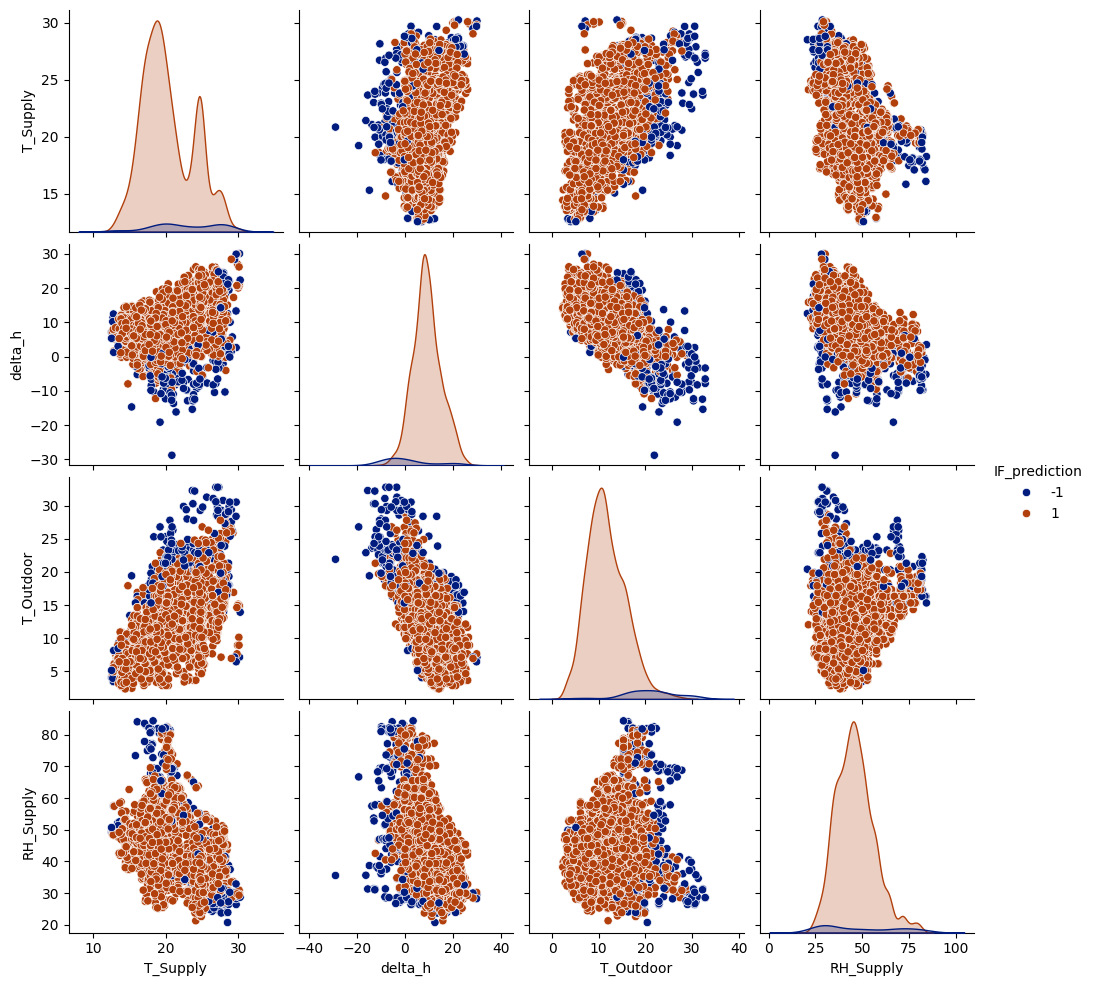

In [39]:
sns.pairplot(X_val_w_labels[['T_Supply', 'delta_h','T_Outdoor', 
                             'RH_Supply', 'IF_prediction']], 
                             hue= 'IF_prediction', 
                             palette='dark')
plt.show()

### Guardar modelo

In [40]:
from load_store_utils import guardar_modelo

guardar_modelo(IF, name='IF_trained.pickle', ruta_modelo='./models/anomaly_detection/')

Modelo guardado con éxito en ./models/anomaly_detection/IF_trained.pickle


True

In [41]:
import joblib
IF_loaded = joblib.load('./models/anomaly_detection/IF_trained.pickle')

IF_loaded

IsolationForest(contamination=0.05)

## Local Outlier Factor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor

### Train

In [42]:
from sklearn.neighbors import LocalOutlierFactor

In [43]:
LOF = LocalOutlierFactor(novelty= False, n_neighbors= 40, algorithm='auto', metric='minkowski')
LOF_train_labels = LOF.fit_predict(X_train_scl_df)

X_train_w_labels['LOF_prediction'] = LOF_train_labels
#X_train_w_labels.head()

In [44]:
print(X_train_w_labels['LOF_prediction'].value_counts())
X_train_w_labels[X_train_w_labels['LOF_prediction']==-1].sample(10)

LOF_prediction
 1    11333
-1      103
Name: count, dtype: int64


T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2021-03-02 06:00:00  16.980000  19.720000       19.5     15.869999   8.300000   
2020-02-03 23:00:00  21.042499  21.515000       22.5     21.759999  22.400000   
2019-12-09 04:00:00  16.552499  17.390000       22.5     15.870000  10.800000   
2019-11-06 12:30:00  17.472499  20.872499       22.5     14.060000  17.400000   
2019-12-02 14:00:00  24.734999  21.480000       22.5     17.920000  12.600000   
2021-03-08 09:00:00  24.910000  21.232499       20.5     17.589999   8.100000   
2020-02-03 22:30:00  21.245000  21.677500       22.5     22.030000  22.900000   
2021-02-25 14:30:00  23.244999  22.964999       22.5     21.009999  23.799999   
2020-10-17 17:00:00  20.077499  20.569999       22.5     20.090000  22.900000   
2020-11-23 04:00:00  16.787500  18.165000       22.5     15.850000   5.400000   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2021-03-02 06:00:00  43.914999  30.959998       65.00     5.0  2.502   
2020-02-03 23:00:00  36.029999  25.709999       98.25     0.0  0.000   
2019-12-09 04:00:00  50.874998  40.254999       87.00     5.0  2.490   
2019-11-06 12:30:00  65.070000  49.765000       82.00     8.0  3.738   
2019-12-02 14:00:00  38.759998  35.139999       69.75     0.0  4.920   
2021-03-08 09:00:00  36.189999  31.225000       82.50    12.0  4.986   
2020-02-03 22:30:00  35.899999  26.159999       86.50     0.0  0.000   
2021-02-25 14:30:00  38.465000  29.909999       30.00    13.0  5.136   
2020-10-17 17:00:00  54.294998  45.539999       59.00     0.0  0.000   
2020-11-23 04:00:00  42.885000  32.110000       80.00     4.5  2.424   

                       delta_h        KPI  T_wb_out  month  day  hour  \
Timestamp                                                               
2021-03-02 06:00:00  10.886044   0.999819  1.116114      3    2     6   
2020-02-03 23:00:00 -29.311965 -39.777724  7.168147      2    3    23   
2019-12-09 04:00:00   3.163070   0.343855  2.139218     12    9     4   
2019-11-06 12:30:00  -5.165857  -1.180377  5.029920     11    6    12   
2019-12-02 14:00:00  15.212615   1.946578  2.977311     12    2    14   
2021-03-08 09:00:00  20.828623   1.870703  0.966849      3    8     9   
2020-02-03 22:30:00 -25.538310 -50.342047  7.404344      2    3    22   
2021-02-25 14:30:00   2.754491 -27.669941  7.771143      2   25    14   
2020-10-17 17:00:00  -8.712682 -43.628458  7.418594     10   17    17   
2020-11-23 04:00:00  13.050986   0.994662 -0.233717     11   23     4   

                     IF_prediction  LOF_prediction  
Timestamp                                           
2021-03-02 06:00:00              1              -1  
2020-02-03 23:00:00             -1              -1  
2019-12-09 04:00:00              1              -1  
2019-11-06 12:30:00              1              -1  
2019-12-02 14:00:00              1              -1  
2021-03-08 09:00:00              1              -1  
2020-02-03 22:30:00             -1              -1  
2021-02-25 14:30:00              1              -1  
2020-10-17 17:00:00             -1              -1  
2020-11-23 04:00:00              1              -1

### validación

In [45]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings('ignore')

In [46]:
LOF = LocalOutlierFactor(novelty= True, n_neighbors= 40, algorithm='auto', metric='minkowski')
LOF.fit(X_train_scl_df)
LOF_val_labels = LOF.predict(X_val_scl_df)

X_val_w_labels['LOF_prediction'] = LOF_val_labels
X_val_w_labels.head()

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2019-12-30 10:30:00  24.677500  20.217500       22.5     17.559999        9.4   
2021-02-27 01:30:00  19.972500  20.544999       19.5     20.399999       13.5   
2021-01-09 08:00:00  20.274999  18.247499       22.5     18.229999        4.3   
2020-01-01 18:30:00  24.769999  20.569999       22.5     17.750000       10.4   
2021-03-07 20:00:00  18.619999  18.837499       20.5     18.559999       12.1   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2019-12-30 10:30:00  36.669998  32.814999       100.0    12.0  4.860   
2021-02-27 01:30:00  45.980000  36.294998        64.0     0.0  0.000   
2021-01-09 08:00:00  30.850000  24.214999        74.0    12.0  4.992   
2020-01-01 18:30:00  34.430000  29.259999        70.0    12.5  4.902   
2021-03-07 20:00:00  46.614998  37.504999        71.0     0.0  0.000   

                       delta_h       KPI  T_wb_out  month  day  hour  \
Timestamp                                                              
2019-12-30 10:30:00  14.776503  1.433140  1.465860     12   30    10   
2021-02-27 01:30:00   7.816635  1.093036  3.379147      2   27     1   
2021-01-09 08:00:00  17.933847  1.289275 -0.714274      1    9     8   
2020-01-01 18:30:00  17.484945  1.861024  2.020213      1    1    18   
2021-03-07 20:00:00   6.538372  0.799461  2.757249      3    7    20   

                     IF_prediction  LOF_prediction  
Timestamp                                           
2019-12-30 10:30:00              1               1  
2021-02-27 01:30:00              1               1  
2021-01-09 08:00:00              1               1  
2020-01-01 18:30:00              1               1  
2021-03-07 20:00:00              1               1

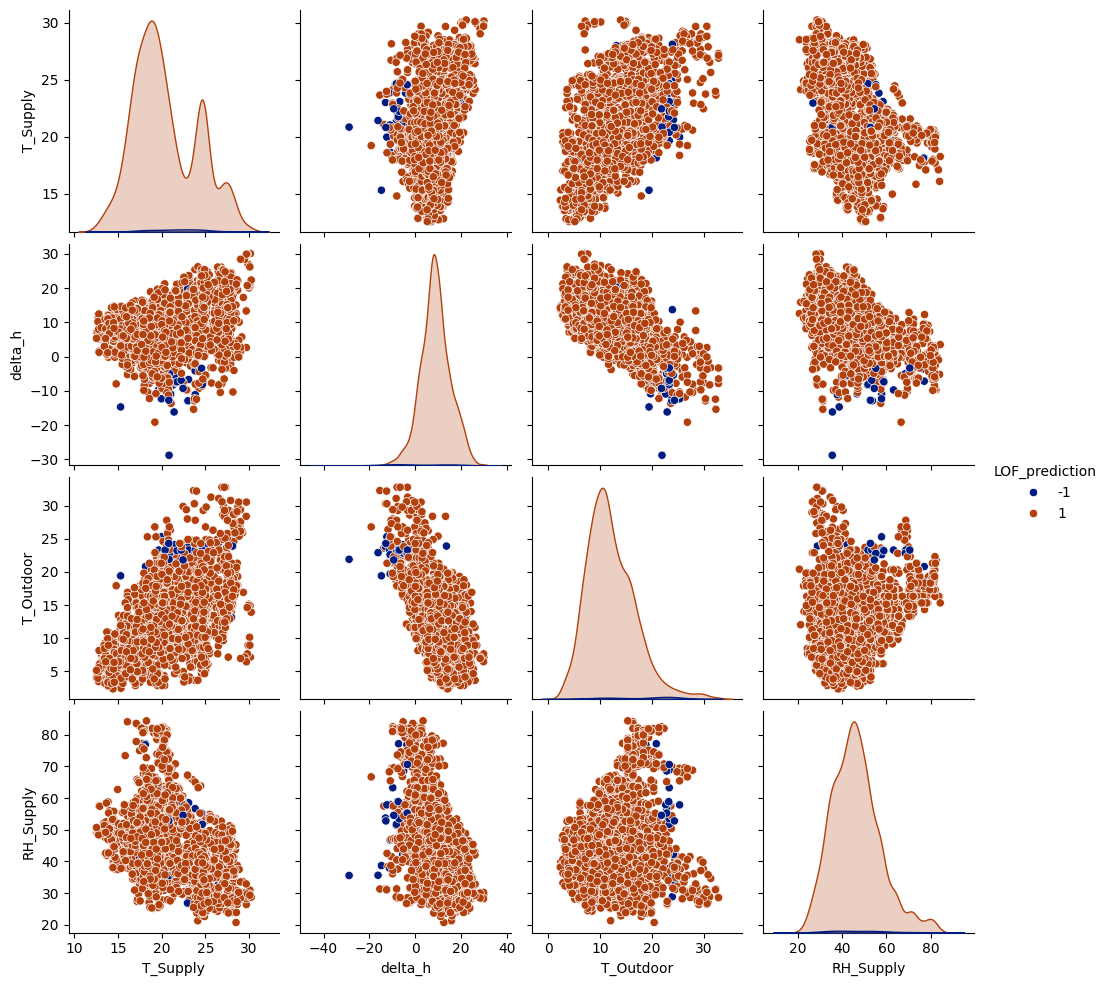

In [47]:
sns.pairplot(X_val_w_labels[['T_Supply', 'delta_h','T_Outdoor', 
                             'RH_Supply', 'LOF_prediction']], 
                             hue= 'LOF_prediction', 
                             palette='dark')
plt.show()

In [49]:
print(X_val_w_labels['LOF_prediction'].value_counts())
X_val_w_labels[X_val_w_labels['LOF_prediction']==-1].sample(10)

LOF_prediction
 1    3764
-1      49
Name: count, dtype: int64


T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2021-03-03 06:00:00  17.502499  19.862499       19.5     16.399999  10.300000   
2020-01-01 20:00:00  23.210000  19.939999       22.5     18.209999   8.400000   
2020-10-31 15:30:00  23.005000  23.000000       23.5     22.319999  23.799999   
2020-11-25 06:00:00  17.967500  18.842500       22.5     17.259999   6.900000   
2020-02-13 20:00:00  23.445000  22.192499       22.5     18.170001  11.900000   
2020-02-26 20:00:00  22.952500  22.082500       22.5     17.599999   9.600000   
2019-12-20 20:00:00  25.424999  21.825000       22.5     21.970000  10.600000   
2020-04-10 11:30:00  26.517499  23.087499       22.5     20.849999  24.450001   
2019-10-18 13:00:00  18.122499  21.325000       21.5     15.680000  18.799999   
2020-10-31 16:30:00  22.205000  22.564999       23.5     22.419999  20.299999   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2021-03-03 06:00:00  41.119999  28.825000       65.00     5.5  2.496   
2020-01-01 20:00:00  36.670000  31.124999       75.00     6.0  0.000   
2020-10-31 15:30:00  53.674999  45.970000       77.00     0.0  0.000   
2020-11-25 06:00:00  41.894998  32.614998       76.25     5.0  2.388   
2020-02-13 20:00:00  31.580000  21.774999       55.00     6.5  2.568   
2020-02-26 20:00:00  26.839999  18.095000       28.50     6.5  2.550   
2019-12-20 20:00:00  47.339998  46.009998       93.00     3.0  0.000   
2020-04-10 11:30:00  32.864999  26.239999       35.50    12.5  5.184   
2019-10-18 13:00:00  76.784999  59.334999       82.00    12.5  5.244   
2020-10-31 16:30:00  54.900000  48.019998       86.50     0.0  0.000   

                       delta_h        KPI  T_wb_out  month  day  hour  \
Timestamp                                                               
2021-03-03 06:00:00   7.395825   0.783069  1.990337      3    3     6   
2020-01-01 20:00:00  18.302264   1.683893  1.127620      1    1    20   
2020-10-31 15:30:00 -12.919539 -14.868911  7.803089     10   31    15   
2020-11-25 06:00:00  12.763629   1.065932  0.458033     11   25     6   
2020-02-13 20:00:00  13.882629   1.680107  2.705609      2   13    20   
2020-02-26 20:00:00  19.778165   2.011766  1.756155      2   26    20   
2019-12-20 20:00:00  20.395212   2.173589  2.027564     12   20    20   
2020-04-10 11:30:00   2.869042 -28.695108  8.054380      4   10    11   
2019-10-18 13:00:00  -3.580907  -1.101408  5.636623     10   18    13   
2020-10-31 16:30:00  -7.437819  -3.144768  6.278542     10   31    16   

                     IF_prediction  LOF_prediction  
Timestamp                                           
2021-03-03 06:00:00              1              -1  
2020-01-01 20:00:00              1              -1  
2020-10-31 15:30:00             -1              -1  
2020-11-25 06:00:00              1              -1  
2020-02-13 20:00:00              1              -1  
2020-02-26 20:00:00              1              -1  
2019-12-20 20:00:00              1              -1  
2020-04-10 11:30:00              1              -1  
2019-10-18 13:00:00             -1              -1  
2020-10-31 16:30:00             -1              -1

### Guardar modelo

In [50]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
guardar_modelo(LOF, name= 'LOF_trained.pickle', ruta_modelo= path)

Modelo guardado con éxito en ./models/anomaly_detection/LOF_trained.pickle


True

## Elliptic Envelope

https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html

### Train

In [51]:
from sklearn.covariance import EllipticEnvelope

In [52]:
EE = EllipticEnvelope(contamination=0.05, random_state=42, support_fraction=1)
EE_train_labels = EE.fit_predict(X_train_scl_df)

X_train_w_labels['EE_prediction'] = EE_train_labels
print(X_train_w_labels['EE_prediction'].value_counts())

EE_prediction
 1    10864
-1      572
Name: count, dtype: int64


In [53]:
X_train_w_labels[X_train_w_labels['EE_prediction']==-1].sample(5)

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2021-02-27 23:00:00  19.962499  20.362499       19.5     20.020000  15.600000   
2020-04-14 21:00:00  24.279999  24.374999       23.5     25.639999  25.299999   
2021-02-28 08:30:00  19.490000  19.880000       19.5     19.649999  11.600000   
2019-10-17 02:00:00  18.570000  19.390000       18.5     19.020000  15.300000   
2019-10-28 14:00:00  20.865000  20.742500       22.5     20.309999  24.299999   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2021-02-27 23:00:00  46.604998  37.024999        62.0     0.0    0.0   
2020-04-14 21:00:00  36.890000  26.189999        48.5     0.0    0.0   
2021-02-28 08:30:00  46.649997  37.490000        57.0     0.0    0.0   
2019-10-17 02:00:00  67.919998  55.424997        82.0     0.0    0.0   
2019-10-28 14:00:00  68.584999  63.090000        68.0     0.0    0.0   

                       delta_h        KPI  T_wb_out  month  day  hour  \
Timestamp                                                               
2021-02-27 23:00:00   4.214815   0.745728  4.287536      2   27    23   
2020-04-14 21:00:00  -7.880001   8.269064  8.429985      4   14    21   
2021-02-28 08:30:00  12.280147   1.447506  2.572403      2   28     8   
2019-10-17 02:00:00   3.728067   0.628597  4.118651     10   17     2   
2019-10-28 14:00:00  -9.408879  18.430811  8.020050     10   28    14   

                     IF_prediction  LOF_prediction  EE_prediction  
Timestamp                                                          
2021-02-27 23:00:00              1               1             -1  
2020-04-14 21:00:00             -1               1             -1  
2021-02-28 08:30:00              1               1             -1  
2019-10-17 02:00:00              1               1             -1  
2019-10-28 14:00:00             -1               1             -1

### Validación

In [54]:
EE_val_labels = EE.predict(X_val_scl_df)

X_val_w_labels['EE_prediction'] = EE_val_labels
print(X_val_w_labels['EE_prediction'].value_counts())
X_val_w_labels[X_val_w_labels['EE_prediction']==-1].sample(5)

EE_prediction
 1    3593
-1     220
Name: count, dtype: int64


T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-03-28 14:00:00  28.252499  22.400000       22.5     21.169999  24.600000   
2020-11-05 13:00:00  23.824999  23.667499       23.5     20.320000  22.799999   
2019-10-23 13:00:00  19.999999  20.325000       22.5     20.309999  22.299999   
2021-03-03 12:00:00  20.247499  22.539999       19.5     17.910000  15.800000   
2019-10-15 09:30:00  16.082500  21.474999       18.5     13.839999  16.299999   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2020-03-28 14:00:00  34.195000  32.314999       42.75    12.5  5.100   
2020-11-05 13:00:00  56.629999  49.959999       72.00    13.5  5.214   
2019-10-23 13:00:00  81.934998  77.224998       88.00     0.0  0.000   
2021-03-03 12:00:00  38.409998  25.725000       55.00    12.5  5.178   
2019-10-15 09:30:00  84.039996  58.394998      100.00    13.5  5.268   

                      delta_h        KPI  T_wb_out  month  day  hour  \
Timestamp                                                              
2020-03-28 14:00:00  3.513598  -7.461866  8.128761      3   28    14   
2020-11-05 13:00:00 -4.165680 -13.868649  7.374717     11    5    13   
2019-10-23 13:00:00 -9.564376 -10.210937  7.143513     10   23    13   
2021-03-03 12:00:00  3.308444   0.590853  4.381695      3    3    12   
2019-10-15 09:30:00 -5.232916  -0.987276  4.500490     10   15     9   

                     IF_prediction  LOF_prediction  EE_prediction  
Timestamp                                                          
2020-03-28 14:00:00              1               1             -1  
2020-11-05 13:00:00             -1              -1             -1  
2019-10-23 13:00:00             -1               1             -1  
2021-03-03 12:00:00              1               1             -1  
2019-10-15 09:30:00             -1               1             -1

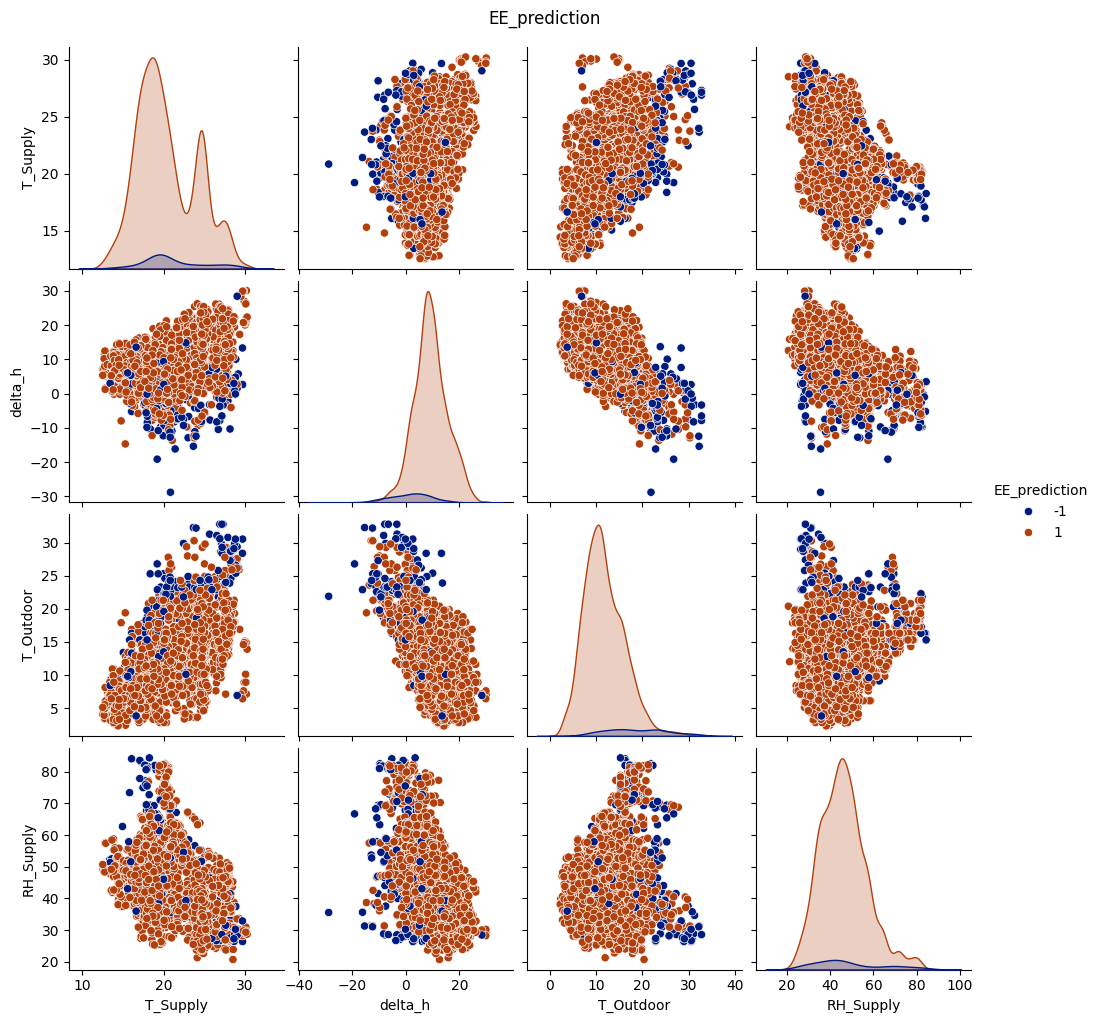

In [55]:
sns.pairplot(X_val_w_labels[['T_Supply', 'delta_h','T_Outdoor', 
                             'RH_Supply', 'EE_prediction']], 
                             hue= 'EE_prediction', 
                             palette='dark')
plt.suptitle("EE_prediction", y=1.02)  #
# plt.title("EE prediction") 
#g.set_title('EE_outlier_prediction')
plt.show()

### Guardar modelo

In [56]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
name = 'EE_trained.pickle'

guardar_modelo(EE, name= name, ruta_modelo= path)

Modelo guardado con éxito en ./models/anomaly_detection/EE_trained.pickle


True

## OneClassSVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html

El One-Class SVM intenta encontrar un límite en el espacio de características que mejor separa los datos de entrenamiento (considerados como "normales") del origen (o de otros puntos considerados como "anómalos"). El objetivo es encapsular la mayoría de los datos de entrenamiento dentro de este límite, excluyendo las anomalías.

### Train y validación

In [57]:
from sklearn.svm import OneClassSVM

In [58]:
for nu in np.linspace(start= 0.01, stop= 0.1, num= 10):
    
    OCSVM = OneClassSVM(kernel= 'rbf', nu= nu, gamma= 'scale')
    OCSVM_train_predictions = OCSVM.fit_predict(X_train_scl_df)
    OCSVM_val_predictions = OCSVM.predict(X_val_scl_df)
    print(f'for nu: {round(nu, 2)} the number of outliers: ')
    print(np.unique(OCSVM_train_predictions, return_counts=True))
    print(np.unique(OCSVM_val_predictions, return_counts=True), '\n')

for nu: 0.01 the number of outliers: 
(array([-1,  1], dtype=int64), array([  125, 11311], dtype=int64))
(array([-1,  1], dtype=int64), array([  48, 3765], dtype=int64)) 

for nu: 0.02 the number of outliers: 
(array([-1,  1], dtype=int64), array([  228, 11208], dtype=int64))
(array([-1,  1], dtype=int64), array([  92, 3721], dtype=int64)) 

for nu: 0.03 the number of outliers: 
(array([-1,  1], dtype=int64), array([  344, 11092], dtype=int64))
(array([-1,  1], dtype=int64), array([ 132, 3681], dtype=int64)) 

for nu: 0.04 the number of outliers: 
(array([-1,  1], dtype=int64), array([  463, 10973], dtype=int64))
(array([-1,  1], dtype=int64), array([ 178, 3635], dtype=int64)) 

for nu: 0.05 the number of outliers: 
(array([-1,  1], dtype=int64), array([  574, 10862], dtype=int64))
(array([-1,  1], dtype=int64), array([ 216, 3597], dtype=int64)) 

for nu: 0.06 the number of outliers: 
(array([-1,  1], dtype=int64), array([  684, 10752], dtype=int64))
(array([-1,  1], dtype=int64), arra

In [59]:
OCSVM = OneClassSVM(kernel= 'rbf', nu= 0.01, gamma= 'scale')
OCSVM_train_predictions = OCSVM.fit_predict(X_train_scl_df)
OCSVM_val_predictions = OCSVM.predict(X_val_scl_df)

X_train_w_labels['OCSVM_prediction'] = OCSVM_train_predictions
X_val_w_labels['OCSVM_prediction'] = OCSVM_val_predictions

X_train_w_labels[X_train_w_labels['OCSVM_prediction']==-1].sample(10)

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-04-12 19:00:00  22.770000  22.987500       22.5     22.470000       31.4   
2021-01-01 23:00:00  12.335000  12.382499       22.5     12.540000        5.1   
2021-01-14 13:30:00  15.455000  15.897500       22.5     14.790000       19.4   
2021-01-01 00:00:00  12.937499  12.884999       22.5     12.970000        4.5   
2021-03-02 00:00:00  19.167499  19.649999       19.5     19.309999       10.3   
2020-02-26 19:30:00  23.814999  22.864999       22.5     16.930000        9.6   
2021-01-26 00:00:00  18.059999  19.739999       22.5     16.200000        6.8   
2019-11-06 12:30:00  17.472499  20.872499       22.5     14.060000       17.4   
2020-04-11 18:00:00  23.819999  24.100000       23.5     24.559999       31.4   
2021-01-26 23:30:00  17.762500  19.914999       22.5     15.960000        5.3   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2020-04-12 19:00:00  36.680000  25.885000       37.75     0.0  0.000   
2021-01-01 23:00:00  51.410000  42.990000      100.00     0.0  0.000   
2021-01-14 13:30:00  37.930000  33.535000       59.00     0.0  0.000   
2021-01-01 00:00:00  49.134998  42.140000       75.00     0.0  0.000   
2021-03-02 00:00:00  40.605000  30.375000       58.00     0.0  0.000   
2020-02-26 19:30:00  25.419999  17.630000       29.25    12.5  5.112   
2021-01-26 00:00:00  27.070000  16.874999       37.25    13.0  4.968   
2019-11-06 12:30:00  65.070000  49.765000       82.00     8.0  3.738   
2020-04-11 18:00:00  31.199999  21.024999       26.75     0.0  0.000   
2021-01-26 23:30:00  29.639999  18.190001       55.00    13.0  4.836   

                       delta_h       KPI   T_wb_out  month  day  hour  \
Timestamp                                                               
2020-04-12 19:00:00 -19.996710  3.688103  10.994266      4   12    19   
2021-01-01 23:00:00   5.103530  0.377936  -0.468161      1    1    23   
2021-01-14 13:30:00 -14.315913 -4.844586   5.921035      1   14    13   
2021-01-01 00:00:00  10.061757  0.729843  -0.626883      1    1     0   
2021-03-02 00:00:00  11.649837  1.237221   2.007260      3    2     0   
2020-02-26 19:30:00  20.494510  2.084281   1.755141      2   26    19   
2021-01-26 00:00:00  14.294582  1.204041   0.525765      1   26     0   
2019-11-06 12:30:00  -5.165857 -1.180377   5.029920     11    6    12   
2020-04-11 18:00:00 -12.452038  2.322188  10.958647      4   11    18   
2021-01-26 23:30:00  14.288997  1.095714  -0.187804      1   26    23   

                     IF_prediction  LOF_prediction  EE_prediction  \
Timestamp                                                           
2020-04-12 19:00:00             -1               1             -1   
2021-01-01 23:00:00             -1               1              1   
2021-01-14 13:30:00              1              -1              1   
2021-01-01 00:00:00              1               1              1   
2021-03-02 00:00:00              1               1              1   
2020-02-26 19:30:00              1               1              1   
2021-01-26 00:00:00              1               1              1   
2019-11-06 12:30:00              1              -1              1   
2020-04-11 18:00:00             -1               1             -1   
2021-01-26 23:30:00              1               1              1   

                     OCSVM_prediction  
Timestamp                              
2020-04-12 19:00:00                -1  
2021-01-01 23:00:00                -1  
2021-01-14 13:30:00                -1  
2021-01-01 00:00:00                -1  
2021-03-02 00:00:00                -1  
2020-02-26 19:30:00                -1  
2021-01-26 00:00:00                -1  
2019-11-06 12:30:00                -1  
2020-04-11 18:00:00                -1  
2021-01-26 23:30:00                -1

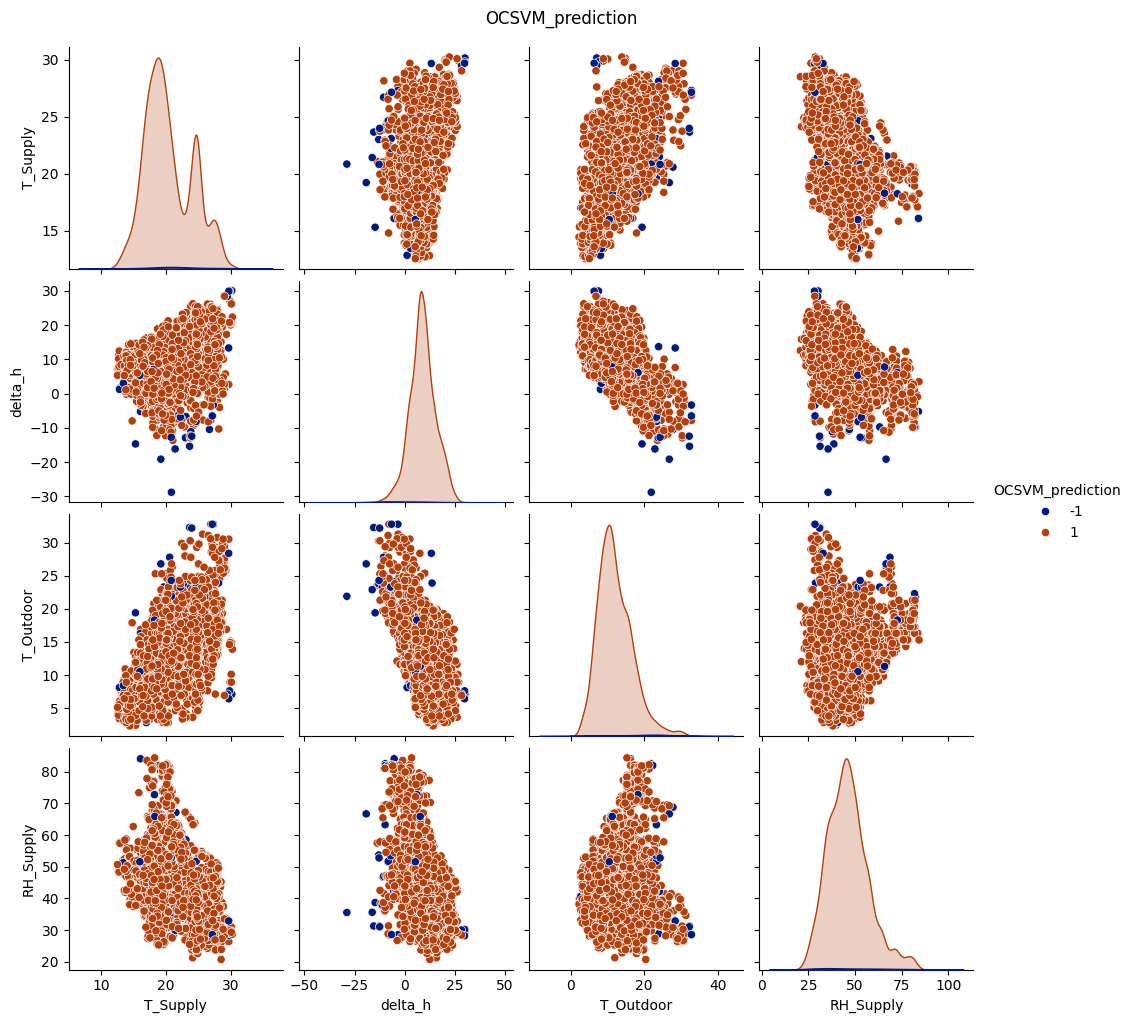

In [60]:
sns.pairplot(X_val_w_labels[['T_Supply', 'delta_h','T_Outdoor', 
                             'RH_Supply', 'OCSVM_prediction']], 
                             hue= 'OCSVM_prediction', 
                             palette='dark')
plt.suptitle("OCSVM_prediction", y=1.02)  #
# plt.title("EE prediction") 
#g.set_title('EE_outlier_prediction')
plt.show()

### Guardar modelo

In [61]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
name = 'OCSVM_trained.pickle'

guardar_modelo(OCSVM, name= name, ruta_modelo= path)

Modelo guardado con éxito en ./models/anomaly_detection/OCSVM_trained.pickle


True

## Gaussian mixtures

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

### Choosing the number of clusters

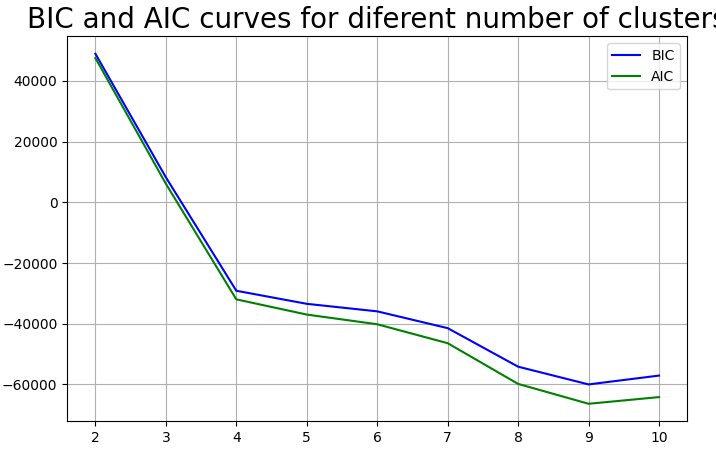

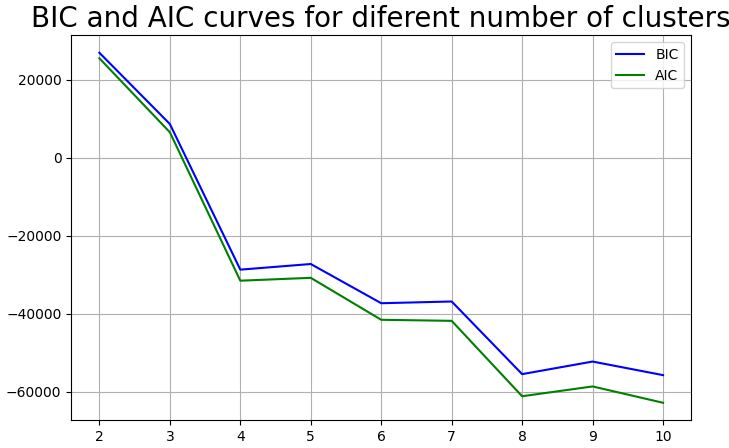

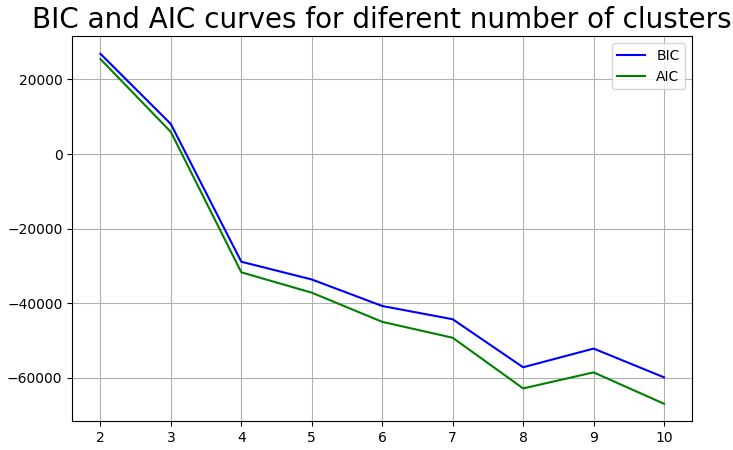



In [62]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

In [63]:
# for rs in range(10):
#     x = range(2, 11)
#     BIC = []
#     AIC = []
#     for cluster in x: 
#         GMM = GaussianMixture(n_components=cluster, n_init= 10, init_params= 'k-means++', random_state=rs)
#         GMM.fit(X_train_scl)
#         BIC.append(GMM.bic(X_train_scl))
#         AIC.append(GMM.aic(X_train_scl))
    
#     plt.figure(figsize= (8, 5))
#     plt.title('BIC and AIC curves for diferent number of clusters', fontsize= 20)
#     plt.plot(x, BIC, label= 'BIC', color= 'blue')
#     plt.plot(x, AIC, label= 'AIC', color= 'green')
#     plt.legend()
#     plt.grid()
#     plt.show()

In [64]:
# for rs in [0, 5, 17, 42]:
#     x = np.arange(3, 11)
#     print(rs)
#     for cluster in x: 
#         BGMM = BayesianGaussianMixture(n_components=cluster, n_init=10, init_params='k-means++', random_state= rs)
#         BGMM.fit(X_train_scl)
#         print(BGMM.weights_.round(2))
#     print('\n')

# Train

In [65]:
GM = GaussianMixture(n_components=4, random_state=0, n_init= 10, init_params='k-means++')
GM.fit(X_train_scl_df)
train_probas = GM.predict_proba(X_train_scl_df).round(4)

print(train_probas)

[[0.000e+00 0.000e+00 1.000e+00 0.000e+00]
 [0.000e+00 9.993e-01 7.000e-04 0.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00]
 ...
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [0.000e+00 7.000e-04 9.993e-01 0.000e+00]]


In [69]:
count = 0
gm_train_labels = []
for n in (train_probas):
    if max(n) <= 0.99: 
        gm_train_labels.append(-1)
        print(n)
        count+= 1
    else: gm_train_labels.append(1)

print(count)

[0.     0.     0.1676 0.8324]
[0.     0.0148 0.9852 0.    ]
[0.1813 0.8187 0.     0.    ]
[0.     0.0339 0.9661 0.    ]
[0.     0.9435 0.0565 0.    ]
[0.     0.6776 0.3224 0.    ]
[0.7534 0.2466 0.     0.    ]
[0.     0.5101 0.4899 0.    ]
[0.11 0.89 0.   0.  ]
[0.0161 0.9839 0.     0.    ]
[0.     0.0217 0.9783 0.    ]
[0.     0.0134 0.9866 0.    ]
[0.7322 0.2678 0.     0.    ]
[0.     0.9822 0.0178 0.    ]
[0.     0.9798 0.0202 0.    ]
[0.     0.0318 0.9682 0.    ]
[0.     0.3853 0.6147 0.    ]
[0.9878 0.     0.0122 0.    ]
[0.     0.9802 0.0198 0.    ]
[0.     0.6214 0.3786 0.    ]
[0.0182 0.9818 0.     0.    ]
[0.     0.9324 0.0676 0.    ]
[0.     0.9781 0.0219 0.    ]
[0.0125 0.9875 0.     0.    ]
[0.     0.     0.1378 0.8622]
[0.1469 0.8531 0.     0.    ]
[0.9842 0.0158 0.     0.    ]
[0.116 0.884 0.    0.   ]
[0.0305 0.9695 0.     0.    ]
[0.0327 0.9673 0.     0.    ]
[0.9765 0.0235 0.     0.    ]
[0.451 0.549 0.    0.   ]
[0.0166 0.9834 0.     0.    ]
[0.9747 0.005  0.0203 0.  

In [70]:
gm_train_labels = np.array(gm_train_labels)

X_train_w_labels['GM4_predictions'] = gm_train_labels

X_train_w_labels[X_train_w_labels['GM4_predictions']==-1].sample(10)

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-11-07 10:30:00  27.159999  23.250000       22.5     20.490000  16.600000   
2020-04-02 21:00:00  23.332499  21.229999       22.5     17.849999  16.600000   
2020-01-29 13:30:00  25.144999  22.094999       22.5     18.299999  16.500000   
2020-02-23 17:30:00  18.649999  18.617500       22.5     18.450000  17.799999   
2020-10-23 10:00:00  27.817499  23.085000       22.5     20.950000  15.300000   
2020-11-06 16:30:00  24.730000  23.462499       23.5     22.590000  21.100000   
2020-03-12 17:00:00  27.557499  22.907500       22.5     21.320000  20.400000   
2020-10-27 11:30:00  27.912498  23.034999       22.5     20.980000  19.299999   
2020-02-21 19:30:00  27.657499  23.354999       22.5     22.399999  13.800000   
2020-10-28 11:30:00  28.192500  23.549999       23.0     21.520000  19.299999   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  ...  \
Timestamp                                                             ...   
2020-11-07 10:30:00  43.794998  42.644998       73.25    13.5  5.178  ...   
2020-04-02 21:00:00  33.330000  25.705000       54.00     7.0  2.484  ...   
2020-01-29 13:30:00  35.144999  30.024999       25.00    13.0  5.178  ...   
2020-02-23 17:30:00  42.329998  34.294998       60.00     0.0  0.000  ...   
2020-10-23 10:00:00  48.434997  49.024999       98.50    13.0  5.166  ...   
2020-11-06 16:30:00  53.164999  48.109999       75.75    13.0  5.220  ...   
2020-03-12 17:00:00  42.709999  40.595000       70.75    13.0  5.076  ...   
2020-10-27 11:30:00  39.704998  39.599998       60.00    13.5  5.178  ...   
2020-02-21 19:30:00  28.964999  22.024999       49.50     6.5  2.634  ...   
2020-10-28 11:30:00  38.199998  35.605000       60.00    12.5  5.166  ...   

                          KPI  T_wb_out  month  day  hour  IF_prediction  \
Timestamp                                                                  
2020-11-07 10:30:00  2.757779  4.700571     11    7    10              1   
2020-04-02 21:00:00  1.177390  4.725427      4    2    21              1   
2020-01-29 13:30:00  3.789128  4.689206      1   29    13              1   
2020-02-23 17:30:00 -0.985655  5.234677      2   23    17              1   
2020-10-23 10:00:00  2.360067  4.068062     10   23    10              1   
2020-11-06 16:30:00 -0.065441  6.639624     11    6    16              1   
2020-03-12 17:00:00  2.260758  6.342745      3   12    17              1   
2020-10-27 11:30:00  3.646740  5.877700     10   27    11              1   
2020-02-21 19:30:00  2.681292  3.530662      2   21    19              1   
2020-10-28 11:30:00  3.567799  5.877700     10   28    11              1   

                     LOF_prediction  EE_prediction  OCSVM_prediction  \
Timestamp                                                              
2020-11-07 10:30:00               1              1                 1   
2020-04-02 21:00:00               1              1                 1   
2020-01-29 13:30:00               1              1                 1   
2020-02-23 17:30:00               1              1                 1   
2020-10-23 10:00:00               1              1                 1   
2020-11-06 16:30:00               1              1                 1   
2020-03-12 17:00:00               1              1                 1   
2020-10-27 11:30:00               1              1                 1   
2020-02-21 19:30:00               1              1                 1   
2020-10-28 11:30:00               1              1                 1   

                     GM4_predictions  
Timestamp                             
2020-11-07 10:30:00               -1  
2020-04-02 21:00:00               -1  
2020-01-29 13:30:00               -1  
2020-02-23 17:30:00               -1  
2020-10-23 10:00:00               -1  
2020-11-06 16:30:00               -1  
2020-03-12 17:00:00               

### validación

In [71]:
val_probas = GM.predict_proba(X_val_scl_df).round(4)

In [72]:
count = 0

gm_val_labels = []
for n in (val_probas):
    if max(n) <= 0.99: 
        gm_val_labels.append(-1)
        print(n)
        count+= 1
    else: gm_val_labels.append(1)

print(count)

[0.8166 0.1834 0.     0.    ]
[0.9499 0.0501 0.     0.    ]
[0.9006 0.0994 0.     0.    ]
[0.8762 0.0069 0.1169 0.    ]
[0.989 0.011 0.    0.   ]
[0.    0.    0.122 0.878]
[0.     0.7753 0.2247 0.    ]
[0.0826 0.284  0.6333 0.    ]
[0.     0.9024 0.0976 0.    ]
[0.     0.9104 0.0896 0.    ]
[0.    0.984 0.016 0.   ]
[0.547 0.    0.453 0.   ]
[0.    0.726 0.274 0.   ]
[0.     0.8362 0.1638 0.    ]
[0.9758 0.0242 0.     0.    ]
[0.     0.8804 0.1196 0.    ]
[0.     0.     0.0537 0.9463]
[0.     0.9509 0.0491 0.    ]
[0.     0.9875 0.0125 0.    ]
[0.8574 0.1426 0.     0.    ]
[0.9422 0.0209 0.0369 0.    ]
[0.     0.9799 0.0201 0.    ]
[0.971 0.029 0.    0.   ]
[0.     0.3098 0.6902 0.    ]
[0.3042 0.0161 0.6797 0.    ]
[0.     0.0186 0.9814 0.    ]
[0.1517 0.8483 0.     0.    ]
[0.2548 0.7452 0.     0.    ]
[0.0298 0.9702 0.     0.    ]
[0.1964 0.8036 0.     0.    ]
[0.0245 0.     0.9755 0.    ]
[0.9431 0.0569 0.     0.    ]
[0.     0.8214 0.1786 0.    ]
[0.     0.4899 0.5101 0.    ]
[0. 

In [73]:
gm_val_labels = np.array(gm_val_labels)

X_val_w_labels['GM4_predictions'] = gm_val_labels

X_val_w_labels[X_val_w_labels['GM4_predictions']==-1].sample(10)

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2019-10-30 13:30:00  24.004999  23.097500       22.5     21.970000  19.799999   
2021-03-02 22:00:00  19.430000  19.975000       19.5     19.619999  13.800000   
2020-03-12 13:00:00  26.885000  22.540000       22.5     20.839999  20.400000   
2020-11-06 15:00:00  24.939999  23.492500       23.5     22.610000  21.100000   
2020-10-26 08:00:00  27.695000  22.747499       22.5     20.750000  14.800000   
2020-11-03 06:30:00  22.040000  22.240000       22.5     20.049999  15.300000   
2020-11-13 09:30:00  26.875000  23.124999       22.5     20.490000  15.000000   
2021-02-09 17:00:00  18.692499  21.494999       22.5     17.250000  16.299999   
2021-03-08 11:30:00  19.589999  21.602500       21.5     17.760000  15.300000   
2021-03-03 12:00:00  20.247499  22.539999       19.5     17.910000  15.800000   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  ...  \
Timestamp                                                             ...   
2019-10-30 13:30:00  64.254998  60.459999       94.00    12.5  4.920  ...   
2021-03-02 22:00:00  38.060000  27.360000       45.50     0.0  0.000  ...   
2020-03-12 13:00:00  43.189999  40.674999       72.00    13.0  5.094  ...   
2020-11-06 15:00:00  52.619999  48.939999       72.00    13.0  5.202  ...   
2020-10-26 08:00:00  49.895000  51.634998       95.50    13.5  5.142  ...   
2020-11-03 06:30:00  58.659998  50.154999      100.00    13.0  5.214  ...   
2020-11-13 09:30:00  45.049999  42.779999       91.00    12.0  4.812  ...   
2021-02-09 17:00:00  44.304998  32.414999       68.75    12.5  5.028  ...   
2021-03-08 11:30:00  43.215000  32.149998       63.00    12.5  5.082  ...   
2021-03-03 12:00:00  38.409998  25.725000       55.00    12.5  5.178  ...   

                          KPI  T_wb_out  month  day  hour  IF_prediction  \
Timestamp                                                                  
2019-10-30 13:30:00 -0.006983  6.045614     10   30    13              1   
2021-03-02 22:00:00  1.128955  3.535254      3    2    22              1   
2020-03-12 13:00:00  1.521201  6.341536      3   12    13              1   
2020-11-06 15:00:00  0.930911  6.643015     11    6    15              1   
2020-10-26 08:00:00  2.644784  3.859998     10   26     8              1   
2020-11-03 06:30:00  0.646911  4.062680     11    3     6              1   
2020-11-13 09:30:00  2.043557  3.962049     11   13     9              1   
2021-02-09 17:00:00 -0.498392  4.578777      2    9    17              1   
2021-03-08 11:30:00  0.443762  4.156953      3    8    11              1   
2021-03-03 12:00:00  0.590853  4.381695      3    3    12              1   

                     LOF_prediction  EE_prediction  OCSVM_prediction  \
Timestamp                                                              
2019-10-30 13:30:00               1              1                 1   
2021-03-02 22:00:00               1             -1                 1   
2020-03-12 13:00:00               1              1                 1   
2020-11-06 15:00:00               1              1                 1   
2020-10-26 08:00:00               1              1                 1   
2020-11-03 06:30:00               1              1                 1   
2020-11-13 09:30:00               1              1                 1   
2021-02-09 17:00:00               1              1                 1   
2021-03-08 11:30:00               1              1                 1   
2021-03-03 12:00:00               1             -1                 1   

                     GM4_predictions  
Timestamp                             
2019-10-30 13:30:00               -1  
2021-03-02 22:00:00               -1  
2020-03-12 13:00:00               -1  
2020-11-06 15:00:00               -1  
2020-10-26 08:00:00               -1  
2020-11-03 06:30:00               -1  
2020-11-13 09:30:00               

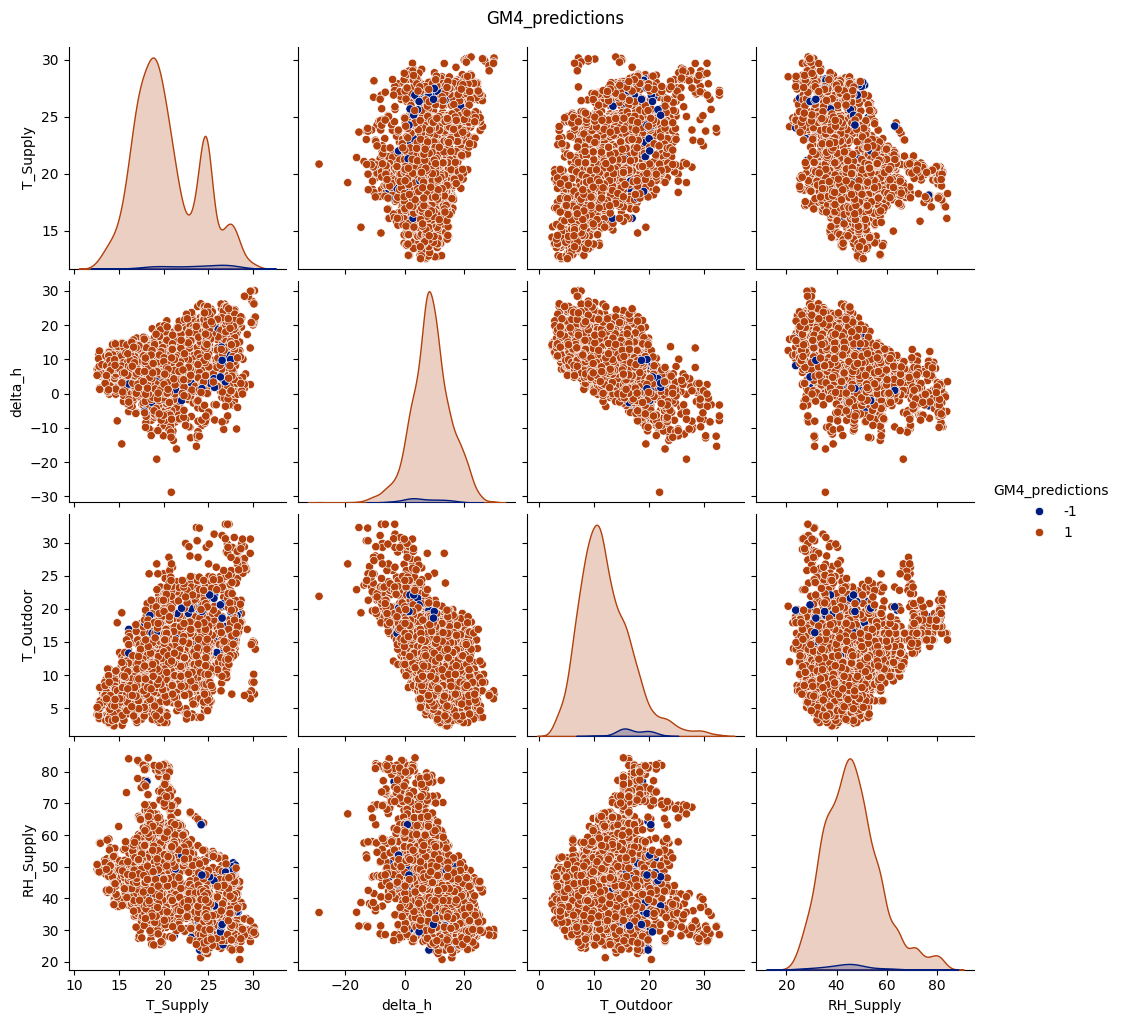

In [74]:
sns.pairplot(X_val_w_labels[['T_Supply', 'delta_h','T_Outdoor', 
                             'RH_Supply', 'GM4_predictions']], 
                             hue= 'GM4_predictions', 
                             palette='dark')
plt.suptitle("GM4_predictions", y=1.02)  #
# plt.title("EE prediction") 
#g.set_title('EE_outlier_prediction')
plt.show()


### Guardar modelo

In [75]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
name = 'GM_trained.pickle'

guardar_modelo(GM, name= name, ruta_modelo= path)

Modelo guardado con éxito en ./models/anomaly_detection/GM_trained.pickle


True

## Probando dbscan - KNN

### TRAIN

In [76]:
from sklearn.cluster import DBSCAN

In [77]:
X_train_scl_df.head()

T_Supply  T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                     
2020-04-09 23:00:00  0.662214  1.426083   1.599365      2.583675   1.605107   
2020-11-20 20:00:00  1.448211  1.230479   0.859225      1.303768  -0.027849   
2020-01-20 19:30:00  1.220018  0.775488   0.119085     -0.454952  -0.621651   
2021-02-02 13:30:00 -0.117617  0.786119   0.119085     -0.183317   0.905269   
2020-01-27 19:00:00  1.235094  0.842461   0.119085     -0.395100  -0.133885   

                     RH_Supply  RH_Return  RH_Outdoor    Energy     Power  \
Timestamp                                                                   
2020-04-09 23:00:00  -1.168410  -1.431299   -1.664394 -0.960379 -0.959378   
2020-11-20 20:00:00  -1.072470  -0.916250   -1.290617  0.046256  0.064811   
2020-01-20 19:30:00  -1.646246  -1.499307   -0.991596  1.136778  1.099066   
2021-02-02 13:30:00  -0.001296  -0.281054    0.005142  1.220665  1.177076   
2020-01-27 19:00:00  -0.811662  -0.579837    0.254326  1.220665  1.192174   

                      delta_h       KPI  T_wb_out     month       day  \
Timestamp                                                               
2020-04-09 23:00:00 -0.995300 -0.030158  1.611591 -0.529507 -0.798599   
2020-11-20 20:00:00  1.857548  0.204311  0.014721  0.968411  0.452389   
2020-01-20 19:30:00  1.682046  0.116400 -0.578710 -1.171472  0.452389   
2021-02-02 13:30:00 -1.654423 -0.208433  0.912605 -0.957483 -1.594683   
2020-01-27 19:00:00  0.937143  0.086210 -0.126481 -1.171472  1.248472   

                         hour  
Timestamp                      
2020-04-09 23:00:00  1.668730  
2020-11-20 20:00:00  1.234558  
2020-01-20 19:30:00  1.089834  
2021-02-02 13:30:00  0.221490  
2020-01-27 19:00:00  1.089834

In [78]:
X_train_scl_df.shape

(11436, 16)

In [80]:
dbscan = DBSCAN(eps=1.75, min_samples=80, algorithm='auto', metric='euclidean')
dbscan.fit(X_train_scl_df)
dbscan_labels = dbscan.labels_

print(np.unique(dbscan_labels, return_counts=True))

(array([-1,  0,  1], dtype=int64), array([1694, 2529, 7213], dtype=int64))


In [81]:
dbscan.get_params()

{'algorithm': 'auto',
 'eps': 1.75,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 80,
 'n_jobs': None,
 'p': None}

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
# X_dbscan = X_train_scl_df.copy()
# X_dbscan['dbscan_labels'] = dbscan_labels

knn_dbscan = KNeighborsClassifier(n_neighbors=10, algorithm='auto', metric= 'minkowski')
knn_dbscan.fit(X_train_scl_df, dbscan_labels)

dbscan_knn_train_labels = knn_dbscan.predict(X_train_scl_df)

In [84]:
print('Las etiquetas de dbscan: ')
print(np.unique(dbscan_labels, return_counts=True))
porcentaje_outliers = (np.unique(dbscan_labels, return_counts=True)[1][0])/(np.unique(dbscan_labels, return_counts=True)[1].sum())
print(porcentaje_outliers.round(4))
print('\n')

print('las predicciones de knn para esas etiquetas')
print(np.unique(dbscan_knn_train_labels, return_counts=True))
porcentaje_outliers = (np.unique(dbscan_knn_train_labels, return_counts=True)[1][0])/(np.unique(dbscan_knn_train_labels, return_counts=True)[1].sum())
print(porcentaje_outliers.round(4))

Las etiquetas de dbscan: 
(array([-1,  0,  1], dtype=int64), array([1694, 2529, 7213], dtype=int64))
0.1481


las predicciones de knn para esas etiquetas
(array([-1,  0,  1], dtype=int64), array([1598, 2525, 7313], dtype=int64))
0.1397


In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [86]:
accuracy_score(dbscan_labels, dbscan_knn_train_labels).round(4)

0.9843

In [87]:
confusion_matrix(dbscan_labels, dbscan_knn_train_labels)

array([[1561,   18,  115],
       [  13, 2507,    9],
       [  24,    0, 7189]], dtype=int64)

### Validación

In [88]:
dbscan_knn_val_labels = knn_dbscan.predict(X_val_scl_df)
print('las predicciones en validación: ')
print(np.unique(dbscan_knn_val_labels, return_counts=True))
porcentaje_outliers = (np.unique(dbscan_knn_val_labels, return_counts=True)[1][0])/(np.unique(dbscan_knn_val_labels, return_counts=True)[1].sum())
print(porcentaje_outliers.round(4))

las predicciones en validación: 
(array([-1,  0,  1], dtype=int64), array([ 549,  797, 2467], dtype=int64))
0.144


### VALIDANDO DBSCAN KNN CON OTRO ENFOQUE

Aqui saco primero el ground truth con dscan para sacar metricas en validación. Luego el KNN esta solo entrenado en train

In [89]:
X_train_full.shape

(15249, 16)

In [90]:
X_train_full_scl = scaler.transform(X_train_full)

dbscan = DBSCAN(1.75, min_samples=80,algorithm='auto', metric='euclidean')
full_ground_truth = dbscan.fit_predict(X_train_full_scl)

In [91]:
np.unique(full_ground_truth, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([ 1784, 13357,   108], dtype=int64))

In [93]:
X_T, X_V, y_t, y_v = train_test_split(X_train_full_scl, full_ground_truth, shuffle= True, random_state=42)
knn_dbscan_0 = KNeighborsClassifier(n_neighbors=10, algorithm='auto', metric= 'minkowski')
knn_dbscan_0.fit(X_T, y_t)
train_labels = knn_dbscan_0.predict(X_T)
val_labels = knn_dbscan_0.predict(X_V)

In [94]:
train_acc = accuracy_score(y_t, train_labels)
val_acc = accuracy_score(y_v, val_labels)

print(f'train acc: {train_acc.round(4)}')
print(f'val acc: {val_acc.round(4)}')

train acc: 0.9863
val acc: 0.9827


In [95]:
train_conf_m = confusion_matrix(y_t, train_labels)
train_conf_m

array([[ 1200,   105,    10],
       [   34, 10006,     0],
       [    8,     0,    73]], dtype=int64)

In [96]:
val_conf_matrix = confusion_matrix(y_v, val_labels)
val_conf_matrix

array([[ 423,   37,    9],
       [  13, 3304,    0],
       [   7,    0,   20]], dtype=int64)

In [97]:
X_val_w_labels['KNN_DBSCAN'] = val_labels
display(X_val_w_labels.head())

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2019-12-30 10:30:00  24.677500  20.217500       22.5     17.559999        9.4   
2021-02-27 01:30:00  19.972500  20.544999       19.5     20.399999       13.5   
2021-01-09 08:00:00  20.274999  18.247499       22.5     18.229999        4.3   
2020-01-01 18:30:00  24.769999  20.569999       22.5     17.750000       10.4   
2021-03-07 20:00:00  18.619999  18.837499       20.5     18.559999       12.1   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  ...  \
Timestamp                                                             ...   
2019-12-30 10:30:00  36.669998  32.814999       100.0    12.0  4.860  ...   
2021-02-27 01:30:00  45.980000  36.294998        64.0     0.0  0.000  ...   
2021-01-09 08:00:00  30.850000  24.214999        74.0    12.0  4.992  ...   
2020-01-01 18:30:00  34.430000  29.259999        70.0    12.5  4.902  ...   
2021-03-07 20:00:00  46.614998  37.504999        71.0     0.0  0.000  ...   

                     T_wb_out  month  day  hour  IF_prediction  \
Timestamp                                                        
2019-12-30 10:30:00  1.465860     12   30    10              1   
2021-02-27 01:30:00  3.379147      2   27     1              1   
2021-01-09 08:00:00 -0.714274      1    9     8              1   
2020-01-01 18:30:00  2.020213      1    1    18              1   
2021-03-07 20:00:00  2.757249      3    7    20              1   

                     LOF_prediction  EE_prediction  OCSVM_prediction  \
Timestamp                                                              
2019-12-30 10:30:00               1              1                 1   
2021-02-27 01:30:00               1             -1                 1   
2021-01-09 08:00:00               1              1                 1   
2020-01-01 18:30:00               1              1                 1   
2021-03-07 20:00:00               1              1                 1   

                     GM4_predictions  KNN_DBSCAN  
Timestamp                                         
2019-12-30 10:30:00                1           0  
2021-02-27 01:30:00                1          -1  
2021-01-09 08:00:00                1           0  
2020-01-01 18:30:00                1           0  
2021-03-07 20:00:00                1          -1  

[5 rows x 22 columns]

In [98]:
X_val_w_labels['KNN_DBSCAN'].value_counts(normalize= True)

KNN_DBSCAN
 0    0.876213
-1    0.116181
 1    0.007606
Name: proportion, dtype: float64

In [99]:
sns.pairplot(X_val_w_labels[['T_Supply', 'delta_h','T_Outdoor', 
                             'RH_Supply','KNN_DBSCAN']], 
                             hue= 'KNN_DBSCAN', 
                             palette='dark')
plt.suptitle("KNN_DBSCAN", y=1.02)  #
# plt.title("EE prediction") 
#g.set_title('EE_outlier_prediction')
plt.show()

### Guardamos el modelo

In [100]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
name = 'dbscan_knn.pickle'

guardar_modelo(knn_dbscan, name= name, ruta_modelo= path)

Modelo guardado con éxito en ./models/anomaly_detection/dbscan_knn.pickle


True

## Fuzzy c-means

# MAYORITY VOTING

In [101]:
def mayority_voting(row): 
    count_outlier_predictions = (row == -1).sum()
    if count_outlier_predictions > (len(row) / 2): return 1  # anomaly
    else:                                          return 0  # not an anomaly

In [103]:
# iso_for = X_val_w_labels['IF_prediction'] == -1
# ee_en =  X_val_w_labels['EE_prediction'] == -1
# lof = X_val_w_labels['LOF_prediction'] == -1
# ocsvm =  X_val_w_labels['OCSVM_prediction'] == -1
# gm = X_val_w_labels['GM4_prediction'] == -1
# knn_dbs =  X_val_w_labels['KNN_DBSCAN'] == -1

X_val_w_labels['anomaly'] = X_val_w_labels[['IF_prediction', 'LOF_prediction', 'EE_prediction',	
                                            'OCSVM_prediction',	'GM4_predictions', 'KNN_DBSCAN']].apply(lambda x: mayority_voting(x), axis= 1)

X_val_w_labels['anomaly'].value_counts(normalize= True)

anomaly
0    0.991083
1    0.008917
Name: proportion, dtype: float64

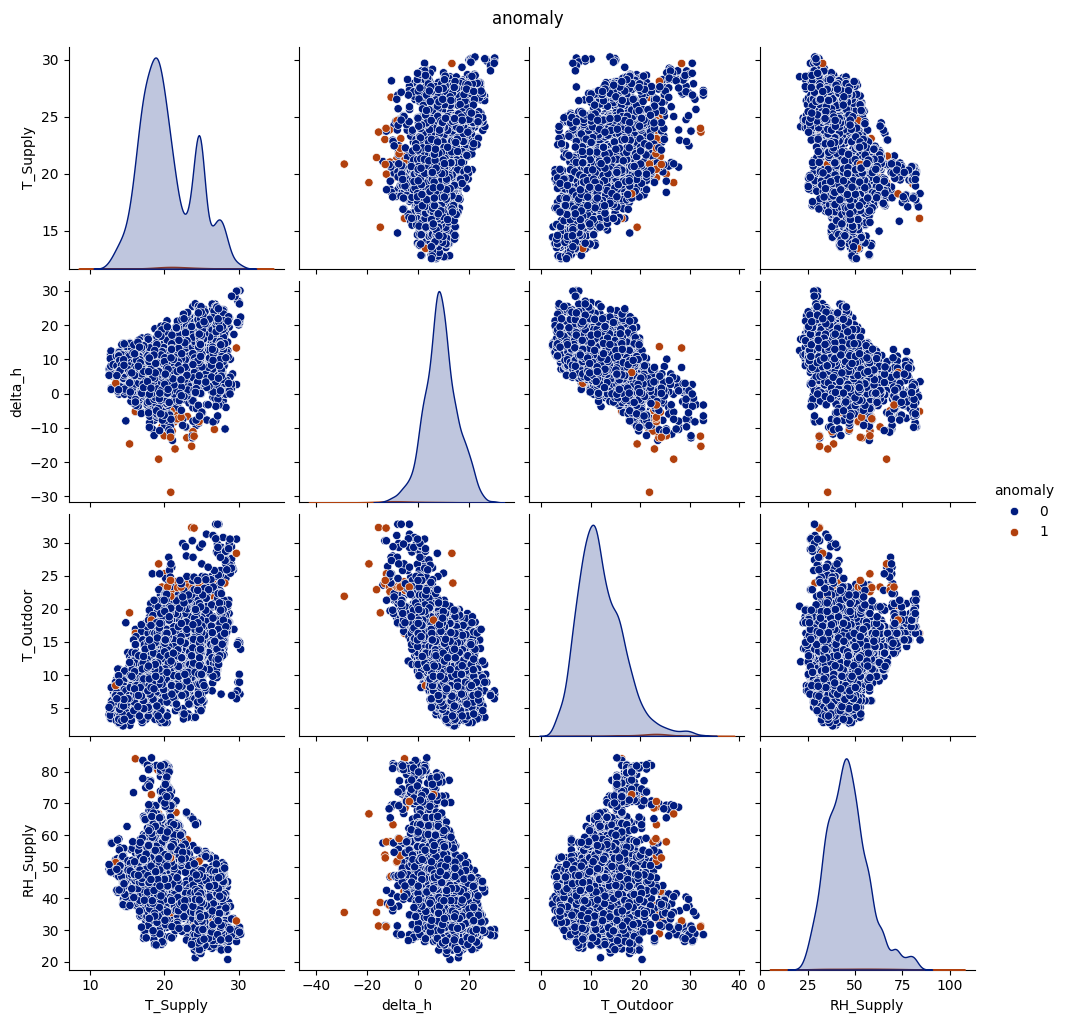

In [104]:
sns.pairplot(X_val_w_labels[['T_Supply', 'delta_h','T_Outdoor', 
                             'RH_Supply', 'anomaly']], 
                             hue= 'anomaly', 
                             palette='dark')
plt.suptitle("anomaly", y=1.02)  #
# plt.title("EE prediction") 
#g.set_title('EE_outlier_prediction')
plt.show()